 The StrataFlip game is based on the description provided
in Sect. 3. In this game, two players compete over a network with multiple nodes.
A node can be any machine in the network. In our experiment we used six nodes:
Node A(10/8), Node B(10/2), Node C(4/2), Node D(4/8), Node E(10/5), Node
F(0/0). Each node has a reward (ρ)andacost(γ). For example, Node A has
reward 10 and cost 8. The defender/attacker has to pay the cost each time
he wants to defend/capture a node. Each node can be either captured by the
attacker (red) or not (blue) as shown in Fig. 3.

The game has ﬁve rounds. Initially, the defender has control over all of the
nodes. The purpose of the attacker/participant is to take over control from the
defender by attacking nodes. In each round, the defender defends a node and
the attacker attacks a node. If the attacker or defender chooses to attack/defend
a node he/she has to pay the cost associated with that node. 

If the defender and attacker do not make the same move then the attacker takes control 
of the node and receives the reward associated with that node and pays the cost. If
both players make the same move then the previous controller of the resource
retains the control and attacker and defender both pay the cost. In each round,
the user interface shows the following information: total points, current round,
time, action history (log), and who currently controls each node. After 
eachround the attacker receives points for all the nodes he controls. Red and blue
mean the attacker or the defender controls a node, respectively. The attacker is
able to observe the eﬀect of the defender action in the next round. Each player
tries to maximize their utility by controlling the nodes.

In [1]:
import pyibl
from pyibl import Agent
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
attacker_agent = Agent(["reward","cost"],decay=0.5, noise=0.25) # define the agent to choose from boxes

attacker_agent.similarity(["reward"], lambda x, y: 1 - abs((x - y)/10))   
attacker_agent.similarity(["cost"], lambda x, y: 1 - abs((x - y)/8))

A= { "reward": 10, "cost": 8 }
B= { "reward": 10, "cost": 2 }
C= { "reward": 4, "cost": 2 }
D= { "reward": 4, "cost": 8 }
E= { "reward": 10, "cost": 5 }
F= { "reward": 0, "cost": 0 }


card_options = [A,B,C,D,E,F] #option for cards



In [9]:
def reward_attack(choice_attack): #function for agent respond(outcome) according to the conding of the game
    
    
    cover=random.choice(card_options)
    
    if choice_attack==cover:  
        if choice_attack==A:     
            r=-8
        elif choice_attack==B:
            r=-2
        elif choice_attack==C:
            r=-2
        elif choice_attack==D:
            r=-8
        elif choice_attack==E:
            r=-5
        elif choice_attack==F:
            r=0
            
            
    if choice_attack!=cover:
        if choice_attack==A:
            r=2
        elif choice_attack==B:
            r=8
        elif choice_attack==C:
            r=2
        elif choice_attack==D:
            r=-4
        elif choice_attack==E:
            r=5
        elif choice_attack==F:
            r=0
        
        
    return r

In [12]:
attacker_agent.trace=True
    
runs = 10 # number of runs (participants)
trials = 100 # number of trials 
mismatch=1.5

average_p_A=[]
average_p_B=[]
average_p_C=[]
average_p_D=[]
average_p_E=[]
average_p_F=[]

average_time = [] # to save time 


for i in range(runs): # Participants
    
    
    pmax_A=[]
    pmax_B=[]
    pmax_C=[]
    pmax_D=[]
    pmax_E=[]
    pmax_F=[]
    
    ttime = [0]
        
    attacker_agent.reset() #clear the memory for a new run
    

    attacker_agent.similarity(["reward"], lambda x, y: 1 - abs((x - y)/10))   
    attacker_agent.similarity(["cost"], lambda x, y: 1 - abs((x - y)/8))

    attacker_agent.mismatch_penalty = mismatch
    
    
    attacker_agent.populate([{"reward":10,"cost":8}],2)
    attacker_agent.populate([{"reward":10,"cost":2}],8)
    attacker_agent.populate([{"reward":4,"cost":2}],2)
    attacker_agent.populate([{"reward":4,"cost":8}],-4)
    attacker_agent.populate([{"reward":10,"cost":5}],5)
    attacker_agent.populate([{"reward":0,"cost":0}],0)
    
    
   
    
    
    
    for i in range(trials): 
        
   
        start = time.time()
        choice_attack = attacker_agent.choose(card_options) # choose one option from the list of two box
        

    
        r=reward_attack(choice_attack)
        attacker_agent.respond(r)
       
        end = time.time()
        ttime.append(ttime[-1]+ end - start)
      
        pmax_A.append(choice_attack==A)
        pmax_B.append(choice_attack==B)
        pmax_C.append(choice_attack==C)
        pmax_D.append(choice_attack==D)
        pmax_E.append(choice_attack==E)
        pmax_F.append(choice_attack==F)
        
    average_p_A.append(pmax_A)
    average_p_B.append(pmax_B)
    average_p_C.append(pmax_C)
    average_p_D.append(pmax_D)
    average_p_E.append(pmax_E)
    average_p_F.append(pmax_F)
    
    
    average_time.append(ttime) # save time of each run 
    
   




reward: 10, cost: 8 → 2.2379068680766627
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |     [0]     |    2    |       0.0       |  0.6046564561651713  |         0.0         |  0.6046564561651713 |   0.9044828260784471   |
| 0013 |   10   |  2   |    0    |     [0]     |    8    |       0.0       | 0.06288278424098259  |        -1.125       | -1.0621172157590175 |  0.00810933164063904   |
| 0014 |   4    |  2   |    0    |     [0]     |    2    |       0.0       | -0.4805554344498435  | -2.0250000000


reward: 0, cost: 0 → 0.059002117537883286
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |     [0]     |    2    |       0.0       |  0.2631881020441732  |         -3.0        |  -2.736811897955827  | 0.0005102232371328881 |
| 0013 |   10   |  2   |    0    |     [0]     |    8    |       0.0       | -0.49407792061377304 |        -1.875       |  -2.369077920613773  | 0.0014436892652420737 |
| 0014 |   4    |  2   |    0    |     [0]     |    2    |       0.0       | -0.45171228569332394 | -0.975000000


reward: 10, cost: 5 → 5.871765649731184
+------+--------+------+---------+-------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0012 |   10   |  8   |    0    |     [0]     |    2    | -0.3465735902799726 |   0.576004675258468   |       -0.5625       |  -0.3330689150215046  |  0.22189623627229563   |
| 0013 |   10   |  2   |    0    |    [0, 1]   |    8    |  0.5347999967395703 | -0.005979282719319982 |       -0.5625       | -0.033679285979749674 |   0.5175010820604716   |
| 0014 |   4    |  2   |    0    |     [0]     |    2    | -0.3465735902799726 


reward: 4, cost: 8 → -3.301111981850385
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 | 0.22889686908981635  | -0.8999999999999999 | -1.2204092752442386  |  0.05568674899145195  |
| 0013 |   10   |  2   |    0    |    [0, 1]   |    8    | 0.25033610016656127 | -0.41154572319188415 | -2.0250000000000004 |  -2.186209623025323  | 0.0036256961754309353 |
| 0014 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 | -0.3820105342


reward: 4, cost: 2 → 6.433101499932859
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |     [0]     |    2    | -0.6931471805599453 |  0.655445835969296   | -2.0250000000000004 |  -2.06270134459065  | 0.0016479623845966213 |
| 0013 |   10   |  2   |    0    |  [0, 1, 3]  |    8    |  0.7310931725578742 |  0.3167148929357579  | -0.8999999999999999 | 0.14780806549363223 |   0.8556012013718444  |
| 0014 |   4    |  2   |    0    |     [0]     |    2    | -0.6931471805599453 | -0.6190763338275249


reward: 10, cost: 2 → 7.829792575820508
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |     [0]      |    2    | -0.8047189562170503 | -0.43151591931811895 |        -1.125       | -2.3612348755351693 | 1.6298445651184523e-05 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4] |    8    |  0.9761886432766251 |  0.5540984647855062  |         0.0         |  1.5302871080621312 |   0.982598703635802    |
| 0014 |   4    |  2   |    0    |     [0]      |    2    | -0.8047189562170503 | -0.4020



reward: 10, cost: 8 → 7.969344087278063
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |       [0]       |    2    | -0.8958797346140275 |  -1.207322763083466  |         0.0         | -2.1032024976974935 | 0.00043454806899903727 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5] |    8    |  1.1441969831346805 |  0.6131965533986178  |        -1.125       |  0.6323935365332982 |   0.9962371341857285   |
| 0014 |   4    |  2   |    0    |       [0]       |    2    | -0.8958797


reward: 0, cost: 0 → 2.618492642733737
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |       [0]       |    2    | -0.8958797346140275 |  0.5173840320412086  |         -3.0        | -3.3784957025728186  | 0.00018551116603752037 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5] |    8    |  1.1441969831346805 | -0.00882173291510447 |        -1.875       |  -0.739624749780424  |   0.3235048082705724   |
| 0014 |   4    |  2   |    0    |       [0]       |    2    | -0.8958


reward: 4, cost: 8 → 7.940381319515562
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |        [0]         |    2    | -0.9729550745276566 |  0.2636616412443848  | -0.8999999999999999 | -1.6092934332832718 |  0.002083162159212675  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6] |    8    |  1.2727532011195322 |  1.3233292670371304  | -2.0250000000000004 |  0.5710824681566624 |   0.993189369110567    |
| 0014 |   4    |  2   |    0    |        [0]         |    2


reward: 10, cost: 2 → 7.230321926613177
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |        [0]         |    2    | -1.0397207708399179 |  -0.5632999630030808  |        -1.125       | -2.7280207338429987 | 0.00012376273942984935 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6] |    8    |  1.0862658877214622 |  -0.6590840271169431  |         0.0         |  0.427181860604519  |   0.9297090281736398   |
| 0014 |   4    |  2   |    0    |        [0]         


reward: 0, cost: 0 → 1.795372527266832
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |        [0]         |    2    | -1.0397207708399179 | -0.055510155950861534 |         -3.0        |  -4.095230926790779 |  8.06280362325129e-05  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6] |    8    |  1.0862658877214622 |  -0.5115111218163424  |        -1.875       | -1.3002452340948802 |  0.21865704562047628   |
| 0014 |   4    |  2   |    0    |        [0]         |


reward: 4, cost: 8 → 3.9596114053266223
+------+--------+------+---------+-----------------------+---------+---------------------+-------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |      occurrences      | outcome |   base activation   |     activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------+---------+---------------------+-------------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |          [0]          |    2    | -1.0986122886681098 |   -0.4952196660545287   | -0.8999999999999999 | -2.4938319547226384  |  0.001092600171460124  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8] |    8    |  1.2863908398032466 |    0.5155819527174132   | -2.0250000000000004 | -0.22302720747934046 |   0.6727448106998885   |
| 0014 |   4    |  2   |


reward: 10, cost: 2 → 7.929505766046163
+------+--------+------+---------+-----------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |      occurrences      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |          [0]          |    2    | -1.1512925464970227 | -0.0731757000340144  |        -1.125       | -2.3494682465310373  | 1.0080960017964284e-05 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8] |    8    |  1.1282015886678183 |  0.5871091110779011  |         0.0         |  1.7153106997457193  |   0.9921003354231365   |
| 0014 |   4    |  2   |    0    |     


reward: 0, cost: 0 → 4.051126302946174
+------+--------+------+---------+-----------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |      occurrences      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |          [0]          |    2    | -1.1512925464970227 | -0.4591165987850311  |         -3.0        |  -4.610409145282054 | 1.718901779474426e-05 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8] |    8    |  1.1282015886678183 | -0.32795595176721726 |        -1.875       |  -1.074754363099399 |   0.3787427786107577  |
| 0014 |   4    |  2   |    0    |         [0, 9] 


reward: 4, cost: 8 → 5.372031713459774
+------+--------+------+---------+---------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |        occurrences        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |            [0]            |    2    | -1.1989476363991853  | -0.39700940216482566 | -0.8999999999999999 |  -2.495957038564011  |  0.001775102871040144  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10] |    8    |  1.3302712485860189  |  0.3195491389956306  | -2.0250000000000004 | -0.37517961241835085 |   0.7150287662651638   |
| 0014 |   4   


reward: 10, cost: 2 → 7.880959940076542
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |              [0]              |    2    | -1.2424533248940002  |  0.2699309959231816  |        -1.125       | -2.0975223289708187 | 0.00018134478318220545 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11] |    8    |  1.4517058014086301  |  -0.508105652992053  |         0.0         |  0.9436001484165771 |   0.9865737919894165   |


reward: 0, cost: 0 → 3.2500296560610735
+------+--------+------+---------+-------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |              [0]              |    2    | -1.2424533248940002  |  0.26011384034654567   |         -3.0        | -3.9823394845474542  | 9.459701058818928e-06  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11] |    8    |  1.4517058014086301  |  0.20587940706559313   |        -1.875       | -0.2174147915257767  |  0.398656


reward: 4, cost: 8 → 7.513300873181337
+------+--------+------+---------+-------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |              [0]              |    2    | -1.2824746787307684  |  -0.4424493698169044  | -0.8999999999999999 | -2.6249240485476726 | 0.0002065266912111951 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11] |    8    |   1.30257977325392   |   1.0646505701020275  | -2.0250000000000004 | 0.34223034335594704 |   0.9114660486952122  |



reward: 10, cost: 2 → 7.969924819498468
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                [0]                |    2    | -1.3195286648076292  |  1.0836567878735621  |        -1.125       |  -1.360871876934067  | 0.0001337879186000806  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13] |    8    |  1.466683716596381   |  0.3236957779336905  |         0.0         |  1.7903794945300715  |


reward: 0, cost: 0 → 7.481941961325345
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                [0]                |    2    | -1.3195286648076292  | -0.8135533720059237  |         -3.0        |  -5.133082036813553 | 1.503033916298212e-06  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13] |    8    |  1.466683716596381   | -0.01236435541966786 |        -1.875       | -0.4206806388232869 |   0.9


reward: 4, cost: 8 → 7.66304349741257
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                [0]                |    2    |  -1.354025100551105  |  0.3376834640774271  | -0.8999999999999999 | -1.9163416364736778  |  0.004255030062340076 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13] |    8    |  1.3343409962700892  |  0.6944100444520949  | -2.0250000000000004 | 0.003751040722183685 |   0.9


reward: 10, cost: 2 → 7.006773240719849
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    | -1.3862943611198906  | 0.24748407563334796  |        -1.125       | -2.2638102854865427  | 0.00022171307166130009 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.499249936382656   |  -0.828466686739349  |         0.0         |  0


reward: 0, cost: 0 → 6.07857447876248
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    | -1.3862943611198906  |  0.6755064030043444  |         -3.0        | -3.7107879581155463 | 0.00013907192635605997 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.499249936382656   | -0.30504328242752793 |        -1.875       | -0.68079


reward: 4, cost: 8 → 0.21285691423487355
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    |  -1.416606672028108  | 0.18187530169646468  | -0.8999999999999999 |  -2.134731370331643 |  0.018205329969245246 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.374724265518092   | -0.5218060539416046  | -2.0250000000000004 |  -1.17208


reward: 10, cost: 2 → 4.638706579751564
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    | -1.4451858789480823  | -0.13148910629100655 |        -1.125       |  -2.701674985239089 | 8.513464991224456e-06  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.292541971959065   | -0.00684274982250798 |         0.0         |  1.285


reward: 0, cost: 0 → 3.0212554861702725
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    | -1.4451858789480823  | 0.34006923022845026  |         -3.0        | -4.1051166487196316 |  3.68416084408931e-05 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.292541971959065   | -0.4965189163196916  |        -1.875       | -1.0789769


reward: 4, cost: 8 → 0.12419610443929126
+------+--------+------+---------+---------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                  [0]                  |    2    | -1.4722194895832201 | -0.20343087081977737 | -0.8999999999999999 | -2.5756503604029977 | 0.0013534573007913777 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15] |    8    |  1.2280529122047632 | -0.1488754542937296  | -2.0250000000000004 | -0.94582254208


reward: 10, cost: 2 → 7.89110580792795
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                    [0]                    |    2    | -1.4978661367769954  | -0.2612788878357714  |        -1.125       |  -2.884145024612767 | 1.3083872323246367e-05 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19] |    8    |  1.4432493381999387  | -0.35737777772674106 |         0


reward: 0, cost: 0 → 7.919938036537027
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                    [0]                    |    2    | -1.4978661367769954  | -0.3362464937878986  |         -3.0        |  -4.834112630564894 | 5.264065425625024e-07  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19] |    8    |  1.4432493381999387  |  0.7049458480737667  |        -1


reward: 4, cost: 2 → 5.634585313495413
+------+--------+------+---------+-------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                    [0]                    |    2    |  -1.5222612188617115  |  -0.65729425344125   | -2.0250000000000004 |  -4.204555472302962 | 3.0442305836456467e-06 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19] |    8    |   1.3329619191137811  | -0.31435190663225676 | -0.8



reward: 10, cost: 8 → 7.480272653132778
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                      [0]                      |    2    | -1.5455212266791578  |  -0.3308029214260312  |         0.0         | -1.8763241481051889 | 0.0012724584448477632  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |  1.5118621330486095  |  0.049


reward: 4, cost: 8 → 7.257696570706419
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                      [0]                      |    2    | -1.5455212266791578  | 0.03818681495219097 | -0.8999999999999999 |  -2.407334411726967 | 0.0030650075366636257 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |  1.5118621330486095  | 0.10352581112921466 



reward: 10, cost: 8 → 7.756656769068092
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |    base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+---------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                      [0]                      |    2    |  -1.5677471079645748  | 0.02341793451709077 |         0.0         |  -1.544329173447484  | 0.0006328448642480766  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |   1.399725657987807   |  0.77


reward: 4, cost: 8 → 0.719009491847787
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                      [0]                      |    2    |  -1.5677471079645748  | 0.048258421172271575 | -0.8999999999999999 | -2.4194886867923033 |  0.008805581674825359 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |   1.399725657987807   | -0.81109639



reward: 10, cost: 8 → 5.974691095394726
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                    [0, 23]                    |    2    |  0.1857524522288413  | -0.4899264616783908  |         0.0         | -0.30417400944954953 |   0.1411412197715186   |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |  1.3280297508908743  | 0.0187


reward: 4, cost: 8 → 4.040333786540338
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                    [0, 23]                    |    2    |  0.1857524522288413  | -0.16317486132551362 | -0.8999999999999999 | -0.8774224090966722 |  0.21962995954017064  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21] |    8    |  1.3280297508908743  | 0.02444255913292



reward: 10, cost: 8 → 4.647479343425384
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                      [0, 23]                      |    2    | -0.09749510571224644 |  0.3621705985490247  |         0.0         | 0.26467549283677827 |  0.47876711122559984   |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21, 24] |    8    |  1.5194502338


reward: 4, cost: 8 → 4.319104568951563
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                      [0, 23]                      |    2    | -0.09749510571224644 |  0.7884212874448602  | -0.8999999999999999 | -0.20907381826738614 |   0.5109360956918784  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21, 24] |    8    |  1.519450233824



reward: 10, cost: 8 → 5.43743812459469
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                        [0, 23]                        |    2    |  -0.2568730432311974  |  0.3452840581796913  |         0.0         |  0.0884110149484939 |    0.38588998608947    |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21, 24, 25] | 


reward: 4, cost: 8 → 4.190231657951851
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                        [0, 23]                        |    2    |  -0.2568730432311974  | -0.4452428976474015  | -0.8999999999999999 | -1.6021159408785988 |  0.052283522889233026 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21, 24, 25] |    8 



reward: 10, cost: 8 → 6.523927464216775
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                          [0, 23]                          |    2    | -0.36751911611023536 |   0.5520689163336929  |         0.0         | 0.18454980022345757  |  0.21520166065711197  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 1


reward: 4, cost: 8 → 7.398536278046706
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                          [0, 23]                          |    2    | -0.36751911611023536 | 0.11316428633074109  | -0.8999999999999999 |  -1.154354829779494 |   0.0298225252214983  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10, 11, 13, 15, 19, 21, 24,



reward: 10, cost: 8 → 7.301075779757645
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                            [0, 23]                            |    2    | -0.4522488510802993  |  0.11593766864287615  |         0.0         | -0.33631118243742314 |  0.07256912656770831   |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 


reward: 4, cost: 8 → 7.823554990277507
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                            [0, 23]                            |    2    | -0.4522488510802993  |  -0.11119260162535113 | -0.8999999999999999 | -1.4634414527056503 |  0.009496715567149898  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10,



reward: 10, cost: 8 → 5.721062230815177
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                            [0, 23]                            |    2    | -0.5209708654008244  |  -0.526897161615681  |         0.0         |  -1.0478680270165053  |  0.03071146695823842   |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 


reward: 4, cost: 8 → 7.1960678504580935
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                            [0, 23]                            |    2    | -0.5209708654008244  | -0.39494989998536445 | -0.8999999999999999 | -1.8159207653861889  |  0.005801880251132024  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8, 10



reward: 10, cost: 8 → 7.651643558213754
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.5788570667800853  | -0.03697591744554485 |         0.0         | -0.6158329842256302  |   0.0191835478705395   |
| 0013 |   10   |  2   |    0    | [0, 1, 


reward: 4, cost: 8 → 6.803397401854699
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.5788570667800853  | -0.039712771465337526  | -0.8999999999999999 | -1.5185698382454227 |  0.02644586503723759   |
| 0013 |   10   |  2   |    0    | [0, 1



reward: 10, cost: 8 → 7.462673045696217
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.6289361643836785 |  -0.19242151422775647 |         0.0         | -0.8213576786114349 |  0.020055343645633116 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5,


reward: 4, cost: 8 → 5.311160080212059
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.6289361643836785 | 0.21731491050625532  | -0.8999999999999999 | -1.3116212538774232 |  0.055884634755698215 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6, 8,



reward: 10, cost: 8 → 6.6927247708559365
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.6731288341211067 | -0.3417246439301244  |         0.0         |  -1.014853478051231  |  0.030567248565104854 |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5


reward: 4, cost: 8 → 6.023789868736211
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                              [0, 23]                              |    2    | -0.6731288341211067 |  0.4052584205683156  | -0.8999999999999999 | -1.1678704135527909 |  0.010396095433733777  |
| 0013 |   10   |  2   |    0    | [0, 1, 3, 4, 5, 6



reward: 10, cost: 8 → 6.323661507952834
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                [0, 23]                                |    2    | -0.7127267719065187  | -0.026333777315905412 |         0.0         |  -0.739060549222424  |  0.10319264515218918   |
| 0013 |   10   |  2  


reward: 4, cost: 8 → 6.950287479403785
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                [0, 23]                                |    2    | -0.7127267719065187  | 0.17657418754560716 | -0.8999999999999999 | -1.4361525843609115 |  0.010924510830466676  |
| 0013 |   10   |  2   |    0    | [



reward: 10, cost: 8 → 6.663766439585933
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    | -0.7486388976444402 |  0.052775128483172   |         0.0         | -0.6958637691612682 |  0.012507108703360525  |
| 0013 |   10   | 


reward: 4, cost: 8 → 5.001403988855035
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    | -0.7486388976444402 |  0.4951504346285966  | -0.8999999999999999 | -1.1534884630158435  |  0.04389421067466895  |
| 0013 |   10   |  2



reward: 10, cost: 8 → 7.627510266087004
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    | -0.7815282539762903 | -0.15998044322376043 |         0.0         | -0.9415086972000508 |  0.005896815690752905  |
| 0013 |   10   | 


reward: 4, cost: 8 → 6.07065462290827
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    | -0.7815282539762903 |  0.7648068747641982  | -0.8999999999999999 | -0.9167213792120921  |  0.07952337068964273   |
| 0013 |   10   |



reward: 10, cost: 8 → 5.998129120539499
+------+--------+------+---------+---------------------------------------------------------------------------+---------+------------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |    base activation     |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+------------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    |  -0.8118929587508523   |  0.08623760662531763  |         0.0         |  -0.7256553521255347  |  0.0165746909265749


reward: 4, cost: 8 → 3.544460969744313
+------+--------+------+---------+---------------------------------------------------------------------------+---------+------------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |    base activation     |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+------------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                  [0, 23]                                  |    2    |  -0.8118929587508523   |  -0.3196291062837516  | -0.8999999999999999 | -2.0315220650346038 | 0.0043778798453053295 |
| 0013 |



reward: 10, cost: 8 → 2.0914680573653412
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                    [0, 23]                                    |    2    | -0.8401165066368086  | -0.03692994549628521 |         0.0         | -0.8770464521330938  |  0.051472843713542


reward: 4, cost: 8 → 6.494710934645276
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                    [0, 23]                                    |    2    | -0.8401165066368086  | 0.04289925566468925  | -0.8999999999999999 | -1.6972172509721193  |  0.006516659288395566



reward: 10, cost: 8 → 5.506427955472333
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.8665003279258264  |  1.2234980056725573  |         0.0         | 0.35699767774673086 |  0.3317


reward: 4, cost: 8 → 4.2877426111019155
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.8665003279258264  | -0.4608114517658004  | -0.8999999999999999 | -2.2273117796916266  | 0.00



reward: 10, cost: 8 → 5.988353106481849
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.8912855978673789 |  -0.10522720665179656 |         0.0         | -0.9965128045191755  |  0.


reward: 4, cost: 8 → 4.460994306000832
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.8912855978673789 | -0.6170340339147005  | -0.8999999999999999 |  -2.408319631782079  | 0.0012516



reward: 10, cost: 8 → 6.3648630900312435
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.9146682786516056  | 0.030635611676023092 |         0.0         | -0.8840326669755825  |  0


reward: 4, cost: 8 → 3.7169956086457483
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                      [0, 23]                                      |    2    | -0.9146682786516056  | 0.0048356342704262015 | -0.8999999999999999 | -1.8098326443811792  | 



reward: 10, cost: 8 → 4.960855301304434
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                        [0, 23]                                        |    2    |  -0.936809758898841  |  0.7950246066653315  |         0.0         | -0.1417851


reward: 4, cost: 8 → 7.812039287721855
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                        [0, 23]                                        |    2    |  -0.936809758898841  |  0.2249150565867716  | -0.8999999999999999 | -1.611894702312



reward: 10, cost: 8 → 7.430908499155844
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                          [0, 23]                                          |    2    | -0.9578445466286585 | 0.011646908870278465 |         0.0         | -


reward: 4, cost: 8 → 7.181952089459852
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                          [0, 23]                                          |    2    | -0.9578445466286585 | 0.08328420774875708  | -0.8999999999999999 | -1.



reward: 10, cost: 8 → 6.787081401388961
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                          occurrences                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                            [0, 23]                                            |    2    | -0.9778859405883387  |  0.3266314542021988  |       


reward: 4, cost: 8 → 3.272863198967325
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                          occurrences                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                            [0, 23]                                            |    2    | -0.9778859405883387  | -0.2004146010425056  | -0.89



reward: 10, cost: 8 → 7.914918198541208
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                              [0, 23]                                              |    2    | -0.9970302837823803  | 0.24864310


reward: 4, cost: 8 → 3.881482265420666
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                            occurrences                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                              [0, 23]                                              |    2    | -0.9970302837823803  | 0.2267228552318



reward: 10, cost: 8 → 7.995367828608349
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23]                                                |    2    | -1.01536020311


reward: 4, cost: 8 → 6.48409675440579
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23]                                                |    2    | -1.01536020311540



reward: 10, cost: 8 → 7.104983669587567
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                              [0, 23, 45]                                              |    2    |  0.30450701


reward: 4, cost: 8 → 7.061832698195094
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                              [0, 23, 45]                                              |    2    |  0.3045070136406631



reward: 10, cost: 8 → 5.330907704053676
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | 0.05


reward: 4, cost: 8 → 7.542132495863026
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | 0.0555



reward: 10, cost: 8 → 4.447112490261359
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -


reward: 4, cost: 8 → 4.695485821634567
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -0.081



reward: 10, cost: 8 → 7.187153532454038
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -


reward: 4, cost: 8 → 7.118156525564762
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -0.175



reward: 10, cost: 8 → 2.7155006102052734
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2   


reward: 4, cost: 8 → -4.35049599065647
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |    base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    |  -0.24



reward: 10, cost: 8 → 4.747342275433495
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -


reward: 4, cost: 8 → 4.480042548140516
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                [0, 23, 45]                                                |    2    | -0.



reward: 10, cost: 8 → 3.9939322556004866
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45]                                              


reward: 4, cost: 8 → 7.777403573329438
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45]                                                 



reward: 10, cost: 8 → 7.51465334020383
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                               


reward: 4, cost: 8 → 3.7984196066796416
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                        



reward: 10, cost: 8 → 6.932865856045902
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                 


reward: 4, cost: 8 → 5.683735977324661
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                



reward: 10, cost: 8 → 5.566951365403213
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                           


reward: 4, cost: 8 → 4.930859297206303
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                      



reward: 10, cost: 8 → 7.94586851965
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                  


reward: 4, cost: 8 → 5.463793442073235
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45]                                



reward: 10, cost: 8 → 5.594488867601141
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                            


reward: 4, cost: 8 → 4.067859429062849
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                              



reward: 10, cost: 8 → 7.129181835473206
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                                  


reward: 4, cost: 8 → 7.8595693376429745
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                                   



reward: 10, cost: 8 → 3.9260853240994713
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+-----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                        


reward: 4, cost: 8 → 3.4886160225496794
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                  [0, 23, 45, 56]                             



reward: 10, cost: 8 → 6.838234061736743
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |     activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45, 56]        


reward: 4, cost: 8 → 3.418991214321636
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45, 56]                   



reward: 10, cost: 8 → 5.756749525494452
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45, 56]           


reward: 4, cost: 8 → 6.581651649655386
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                    [0, 23, 45, 56]                



reward: 10, cost: 8 → 6.477863366246031
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                      [0, 23, 45, 56]   


reward: 4, cost: 8 → 3.0237870138614857
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                      [0, 23, 45, 56]    



reward: 10, cost: 8 → 6.2907515204896445
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                      [0, 23, 45,


reward: 4, cost: 8 → 2.881617696001685
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                      [0, 23, 45, 56]     



reward: 10, cost: 8 → 6.4822359848941815
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                     


reward: 4, cost: 8 → 7.553808237241517
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                        [0, 23



reward: 10, cost: 8 → 7.695783675936364
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                        [


reward: 4, cost: 8 → -1.1437810982150574
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                        [0, 



reward: 10, cost: 8 → 5.659161826452058
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                             


reward: 4, cost: 8 → 6.221272277201458
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                                  



reward: 10, cost: 8 → 6.999976008053638
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                                             


reward: 4, cost: 8 → 3.4272672714122776
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                                 



reward: 10, cost: 8 → 7.449618532204911
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                              occurrences                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                                 


reward: 4, cost: 8 → 5.778120994295217
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                              | outcome |    base activation    |     activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-------------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    |                       



reward: 10, cost: 8 → 7.283357534028843
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                occurrences                                                                | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |                  


reward: 4, cost: 8 → 0.7573430269454396
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                occurrences                                                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |                      



reward: 10, cost: 8 → 4.940608825197683
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                  occurrences                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |            


reward: 4, cost: 8 → 3.756831399434236
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                  occurrences                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0012 |   10   |  8   |    0    |              



reward: 10, cost: 8 → 7.861436913577644
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0  


reward: 4, cost: 2 → 7.627771341621279
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |  8   |    0    


reward: 0, cost: 0 → 7.74647745573442
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |   10   |  8   |    0    |   


reward: 10, cost: 2 → 7.928874206600681
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                      occurrences                                                                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0012 |   10   |


reward: 4, cost: 8 → 7.482815367823368
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                      occurrences                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |   10   |  8   |   



reward: 10, cost: 8 → 6.901551201510344
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0012 |  


reward: 4, cost: 2 → 7.8161382289546655
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
| 


reward: 10, cost: 5 → 7.97521077174909
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012



reward: 10, cost: 8 → 7.714597701512494
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 


reward: 4, cost: 2 → 7.882407733414359
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0012


reward: 10, cost: 5 → 7.844436936814376
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0012 |



reward: 10, cost: 8 → 6.071744741950913
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+---------------------


reward: 4, cost: 2 → 6.133020460561034
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+



reward: 10, cost: 5 → 6.870393050347804
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+



reward: 10, cost: 8 → 6.5710160404833475
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-------------


reward: 4, cost: 2 → 5.103217698105127
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------


reward: 10, cost: 5 → 7.866983186926389
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-------------



reward: 10, cost: 8 → 7.667171906839545
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+--------------


reward: 4, cost: 2 → 7.883596786387962
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------


reward: 10, cost: 5 → 4.908155877482165
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------



reward: 10, cost: 8 → 7.300524104730315
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------


reward: 4, cost: 2 → 7.9506152404763215
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------


reward: 10, cost: 5 → 7.963248214829372
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+--------



reward: 10, cost: 8 → 7.838254297067277
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+-----------------


reward: 4, cost: 2 → 7.982801721988122
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+


reward: 10, cost: 5 → 7.756826942630171
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------



reward: 10, cost: 8 → 6.11851827416117
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+--


reward: 4, cost: 2 → 7.504505355692482
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+--------------------


reward: 10, cost: 5 → 7.760725499464033
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------



reward: 10, cost: 8 → 7.755601356482599
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+--


reward: 4, cost: 2 → 7.889217437194636
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+--------


reward: 10, cost: 5 → 7.977977972105407
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+------



reward: 10, cost: 8 → 7.575813285969806
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+--------


reward: 4, cost: 2 → 7.879417917928443
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+-----


reward: 10, cost: 5 → 7.586508779199764
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                    occurrences                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+-------



reward: 10, cost: 8 → 7.716797015949111
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------


reward: 4, cost: 2 → 7.187803601420927
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------


reward: 10, cost: 5 → 7.134414221219434
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------



reward: 10, cost: 8 → 7.291795428019698
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------


reward: 4, cost: 2 → 7.487703078392746
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------


reward: 10, cost: 5 → 7.9534400736951945
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                      occurrences                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------



reward: 10, cost: 8 → 7.505679577982552
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---


reward: 4, cost: 2 → 7.933024559457235
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------


reward: 10, cost: 5 → 7.973186365881748
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------



reward: 10, cost: 8 → 7.877793927978707
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------


reward: 4, cost: 2 → 7.939681792083054
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----


reward: 10, cost: 5 → 7.953218312691378
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                        occurrences                                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------



reward: 10, cost: 8 → 6.560481853453228
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                          occurrences                                                                                          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------


reward: 4, cost: 2 → 7.725854570001346
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                          occurrences                                                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------------


reward: 10, cost: 5 → 7.386485350799559
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                          occurrences                                                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------------



reward: 10, cost: 8 → 7.75065656193674
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------


reward: 4, cost: 2 → 7.970776914481817
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------


reward: 10, cost: 5 → 7.964343142046691
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-



reward: 10, cost: 8 → 5.848184487350803
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----


reward: 4, cost: 2 → 3.6634711077063606
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----


reward: 10, cost: 5 → 7.888418007895626
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                            occurrences                                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------



reward: 10, cost: 8 → 6.631039778171621
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----


reward: 4, cost: 2 → 4.575424370330883
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------


reward: 10, cost: 5 → 7.893658328541669
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-



reward: 10, cost: 8 → 6.867367772409648
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----


reward: 4, cost: 2 → 7.910513490895898
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----


reward: 10, cost: 5 → 6.35809582046195
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------



reward: 10, cost: 8 → 7.243416287341259
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.901786066593955
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----


reward: 10, cost: 5 → 7.9105399133270575
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--



reward: 10, cost: 8 → 7.70520911201616
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----


reward: 4, cost: 2 → 7.541809168377641
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----


reward: 10, cost: 5 → 7.272488494503666
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                              occurrences                                                                                              | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----



reward: 10, cost: 8 → 7.756950563147548
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                occurrences                                                                                                | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.807087167922375
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                occurrences                                                                                                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 7.75929577433809
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                occurrences                                                                                                | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 7.114467400311381
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                  occurrences                                                                                                  | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.341721468072491
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                  occurrences                                                                                                  | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 7.885264324241125
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                  occurrences                                                                                                  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 7.933121250107641
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.938281065627554
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 6.498627232360802
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 6.850314003258847
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.507778504776427
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 7.864862251306678
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                    occurrences                                                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 6.358457277206233
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 6.993381792415022
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 7.931193471661406
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 7.61327589524456
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.740660235057151
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 6.456652583385341
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                      occurrences                                                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 7.975036481686511
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                        occurrences                                                                                                        | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 7.3912186945693366
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                        occurrences                                                                                                        | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 5 → 7.9944556091347625
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                        occurrences                                                                                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------



reward: 10, cost: 8 → 0.6721766476084153
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |     [0]     |    2    |       0.0       |  0.8970435855320701  |         0.0         |  0.8970435855320701 |   0.7336801601188657   |
| 0023 |   10   |  2   |    0    |     [0]     |    8    |       0.0       |  0.5692354258725426  |        -1.125       | -0.5557645741274574 |  0.012048150692510397  |
| 0024 |   4    |  2   |    0    |     [0]     |    2    |       0.0       | -0.42091818117137936 | -2.025000000


reward: 0, cost: 0 → 0.1682092268011565
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |     [0]     |    2    |       0.0       | -0.25580095212459736 |         -3.0        |  -3.255800952124597 | 4.5933835769704016e-05 |
| 0023 |   10   |  2   |    0    |     [0]     |    8    |       0.0       | -0.3206426062076949  |        -1.875       |  -2.195642606207695 | 0.0009212971570906435  |
| 0024 |   4    |  2   |    0    |     [0]     |    2    |       0.0       |  0.3745317802156279  | -0.97500000000


reward: 10, cost: 5 → 5.859754255104898
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |     [0]     |    2    | -0.3465735902799726 | -0.09207909595083781 |       -0.5625       | -1.0011526862308104  |  0.061624431352033826 |
| 0023 |   10   |  2   |    0    |    [0, 1]   |    8    |  0.5347999967395703 | -0.3236104703163283  |       -0.5625       | -0.35131047357675793 |   0.3872574610417747  |
| 0024 |   4    |  2   |    0    |     [0]     |    2    | -0.3465735902799726 |  0.3803388868


reward: 4, cost: 8 → -1.8430184408397718
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 | 0.26967200803017555  | -0.8999999999999999 | -1.1796341363038794  |  0.07064223283341936   |
| 0023 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.8261283813962962 | -0.5824907569949599  | -2.0250000000000004 |  -1.781362375598664  |  0.012880102654008229  |
| 0024 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 |  0.9494


reward: 4, cost: 2 → 5.551107179019815
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created | occurrences  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |     [0]      |    2    | -0.6931471805599453 | -0.7582432889109708  | -2.0250000000000004 | -3.4763904694709167  | 2.6069790235638527e-05 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3] |    8    |  1.0240528993914293 | -0.04914118278418999 | -0.8999999999999999 | 0.07491171660723939  |   0.6004151508338236   |
| 0024 |   4    |  2   |    0    |     [0]      |    2    | -0.6931471805599453 |  0.


reward: 10, cost: 2 → 7.9245483281976155
+------+--------+------+---------+-----------------+---------+---------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------+---------+---------------------+---------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |       [0]       |    2    | -0.8047189562170503 |  0.6720750347420618 |        -1.125       | -1.2576439214749886 | 0.0054282698058570195 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4] |    8    |  1.172999231343787  | -0.5916431318070619 |         0.0         |  0.5813560995367251 |   0.9854496050793297  |
| 0024 |   4    |  2   |    0    |       [0]       |    2    | -0.8047189562170503 



reward: 10, cost: 8 → 2.286438015001779
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |       [0]       |    2    | -0.8958797346140275 |  0.3859792872284548  |         0.0         | -0.5099004473855726  |  0.13518393737372902   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4] |    8    |  0.9707482107549676 | 0.09358912263104119  |        -1.125       | -0.06066266661399111 |   0.4816764748775216   |
| 0024 |   4    |  2   |    0    |       [0]       |    2    | -0.89


reward: 0, cost: 0 → 3.3115569503855444
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |       [0]       |    2    | -0.8958797346140275 |  0.4739956092925681  |         -3.0        | -3.4218841253214594 | 0.0006251285345148802 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4] |    8    |  0.9707482107549676 | -0.12495803980039688 |        -1.875       | -1.0292098290454292 |   0.5433245748550339  |
| 0024 |   4    |  2   |    0    |       [0]       |    2    | -0.8958797346140


reward: 4, cost: 8 → 1.7435011214892786
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |        [0]         |    2    | -0.9729550745276566 | -0.6719592438235853  | -0.8999999999999999 | -2.5449143183512417 | 0.0016849375278834712 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  1.197182792732311  |  0.2794342725781466  | -2.0250000000000004 | -0.5483829346895426 |   0.4775992580749278  |
| 0024 |   4    |  2   |    0    |        [0]         |    2    


reward: 10, cost: 2 → 7.866622732500667
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |        [0]         |    2    | -1.0397207708399179 | -0.07572159878589929 |        -1.125       |  -2.240442369625817  | 5.348563363914092e-05  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  1.0275052305602388 | 0.20505101678697904  |         0.0         |  1.2325562473472178  |   0.9871098214750554   |
| 0024 |   4    |  2   |    0    |       [0, 7]       



reward: 10, cost: 8 → 7.0795971141794585
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |        [0]         |    2    | -1.0986122886681098 | -0.39777050180559076 |         0.0         | -1.4963827904737006 |  0.01564125497877758   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.9153556356436309 |  0.0943160426327195  |        -1.125       | -0.1153283217236496 |   0.7775312947085629   |
| 0024 |   4    |  2   |    0    |       [0, 7]       |  


reward: 10, cost: 5 → 6.0803142394219964
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |        [0]         |    2    | -1.0986122886681098 | -1.2243421778756753  |       -0.5625       |  -2.885454466543785 | 2.044105198862204e-05  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.9153556356436309 | 0.47538840553940637  |       -0.5625       |  0.8282440411830372 |   0.7452468789058777   |
| 0024 |   4    |  2   |    0    |       [0, 7]       |   


reward: 4, cost: 2 → 6.475031646736303
+------+--------+------+---------+--------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |       [0, 9]       |    2    |  0.2747698924083453  |  -0.3167347072929689  | -2.0250000000000004 |  -2.066964814884624 |  0.004350400031605382 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.828257998604945   |  -0.17570678959674943 | -0.8999999999999999 | -0.2474487909918044 |   0.7474267282481228  |
| 0024 |   4    |  2   |    0    |       [0, 7]       |


reward: 10, cost: 2 → 4.650363106985658
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |       [0, 9]       |    2    | 0.008581201710896536 | -0.4067838920793096  |        -1.125       |  -1.523202690368413 | 0.0006405265292878004  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.7560299111781761  | 0.21319869934669763  |         0.0         |  0.9692286105248737 |   0.7381858034927226   |
| 0024 |   4    |  2   |    0    |       [0, 7]       



reward: 10, cost: 8 → 3.37498137482119
+------+--------+------+---------+--------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |       [0, 9]       |    2    | -0.14384103622589053 | 0.32489314868909513 |         0.0         |  0.1810521124632046  |   0.483447740946305    |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.6939215104790811  | 0.49475755915036507 |        -1.125       | 0.06367906962944625  |   0.3468741819228674   |
| 0024 |   4    |  2   |    0    |     [0, 7, 11]     


reward: 10, cost: 5 → -3.4792459835585894
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |       [0, 9]       |    2    | -0.14384103622589053 | 0.009287129339996017 |       -0.5625       | -0.6970539068858945 | 0.0070001983114700884  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.6939215104790811  | 0.11396820686147036  |       -0.5625       | 0.24538971734055148 |  0.10064219359529435   |
| 0024 |   4    |  2   |    0    |     [0, 7, 11]   


reward: 4, cost: 2 → 4.447516178340653
+------+--------+------+---------+------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |      occurrences       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |         [0, 9]         |    2    | -0.25186445337218727 |  0.6681498785014897  | -2.0250000000000004 |  -1.608714574870698 | 0.0035631412022292816 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12] |    8    |  1.0630065787201182  | -0.09189727528818127 | -0.8999999999999999 |  0.071109303431937  |  0.41236213765880525  |
| 0024 |   4    |  2   |    0    |      



reward: 10, cost: 8 → 4.2108140110516965
+------+--------+------+---------+----------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |        occurrences         | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0022 |   10   |  8   |    0    |           [0, 9]           |    2    | -0.3362074992898975  |  0.31097863037150797  |         0.0         | -0.025228868918389546 |  0.47126099438531616   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13] |    8    |  1.2560961948317213  |  -0.20670403125384088 |        -1.125       |  -0.07560783642211955 |  0.40867443251803387  


reward: 10, cost: 5 → 4.312916766363452
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |        occurrences         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |           [0, 9]           |    2    | -0.3362074992898975  | 0.08292849027375201  |       -0.5625       | -0.8157790090161455 |  0.015012284806805234 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13] |    8    |  1.2560961948317213  | -1.5863141817528497  |       -0.5625       | -0.8927179869211284 |  0.01207639306974294  |
| 0024 |   4    |  


reward: 4, cost: 2 → 7.212594884094436
+------+--------+------+---------+--------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |          occurrences           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |             [0, 9]             |    2    | -0.4057943919996187  | -0.5843335020862429  | -2.0250000000000004 |  -3.015127894085862  | 3.0730454398425834e-05 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14] |    8    |  1.3889875045150237  | 0.12048865850097469  | -0.8999999999999999 |  0.6094761630159986  |   0.87081304996



reward: 10, cost: 8 → 6.4371935656944945
+------+--------+------+---------+------------------------------------+---------+----------------------+---------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise  | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+----------------------+---------------------+---------------------+-----------------------+------------------------+
| 0022 |   10   |  8   |    0    |               [0, 9]               |    2    | -0.4652716857555318  | 0.44318672970436185 |         0.0         | -0.022084956051169946 |  0.23843004694091904   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15] |    8    |  1.4911430364808236  | 0.01707514723875077 |        -1.125       |   0.383218183719


reward: 10, cost: 5 → 7.740077675327773
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |               [0, 9]               |    2    | -0.4652716857555318  |  -0.209837786260002  |       -0.5625       | -1.2376094720155337 | 0.0038685089100954496  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15] |    8    |  1.4911430364808236  | -0.2148763122453969  |       -0.5625       |  0.7137667242354266 |


reward: 4, cost: 2 → 6.761344869672228
+------+--------+------+---------+----------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                 [0, 9]                 |    2    |  -0.5173652679859144  | -0.26311085947534457 | -2.0250000000000004 | -2.8054761274612594 | 3.1617945557411265e-05 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |   1.574541627263841   | 0.10173461287350506  | -0.8999999999999999



reward: 10, cost: 8 → 4.981327644987182
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    |  0.4504611591078888  | -0.39166590160497766 |         0.0         | 0.05879525750291115 |   0.4915598763183875   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |  1.4308594426674661  | -0.2404162183554327  |        -1.125       | 


reward: 10, cost: 5 → 7.854341753520322
+------+--------+------+---------+----------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    |  0.4504611591078888  |  -0.05375507250990155 |       -0.5625       | -0.16579391340201277 |  0.015073154768865385  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |  1.4308594426674661  |   0.4404050279789391  |       -0.5625 


reward: 4, cost: 2 → 5.489045416561027
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    |  0.2253413592232254  | -0.8363770227316598  | -2.0250000000000004 |  -2.6360356635084345  | 0.00023882531637659166 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |   1.33604768602599   | -0.31637660899818576 | -0.8999999999999



reward: 10, cost: 8 → 6.202697107686085
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    | 0.09755167624346983  | -0.7679130580306479  |         0.0         | -0.6703613817871781  |  0.12173622544773642  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |  1.2628551304586668  | -0.26839659328748783 |        -1.125       | 


reward: 10, cost: 5 → 7.89029857993167
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    | 0.09755167624346983  | -0.12995243244493418 |       -0.5625       | -0.5949007562014643 |  0.006983813255790535 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |  1.2628551304586668  | 0.45468905033155005  |       -0.5625       |  1.155


reward: 4, cost: 2 → 3.150821129414678
+------+--------+------+---------+----------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |              occurrences               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+----------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |               [0, 9, 17]               |    2    | 0.0068693765450983865 |  0.2598240905882032  | -2.0250000000000004 | -1.7583065328666987  | 0.0033317358177421654 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16] |    8    |   1.2023686022621483  | -0.4179934349938992  | -0.8999999999999999



reward: 10, cost: 8 → 5.843963423841926
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |                 [0, 9, 17]                 |    2    | -0.06425652360321846 | -0.10908578131313121 |         0.0         | -0.17334230491634967 |  0.12577943945295403  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21] |    8    |  1.425387819067003   | -0.02863448828334452 |   


reward: 10, cost: 5 → 6.561745465582326
+------+--------+------+---------+--------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                 [0, 9, 17]                 |    2    | -0.06425652360321846 |  0.30292645456630257  |       -0.5625       | -0.3238300690369159 |  0.019271294178142245  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21] |    8    |  1.425387819067003   |  0.006655850043515252 


reward: 4, cost: 2 → 2.9018212327587625
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |                 [0, 9, 17]                 |    2    | -0.12327112798586375 | -0.4695597891577895  | -2.0250000000000004 | -2.6178309171436536  | 3.924516402260252e-05 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21] |    8    |  1.3151173917684622  | -0.14277101491557534 | -0.



reward: 10, cost: 8 → 7.543607217458675
+------+--------+------+---------+------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                   [0, 9, 17]                   |    2    | -0.17401117429160967 | -0.1591821110415777  |         0.0         | -0.3331932853331874 |  0.038016791546758466  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23] |    8    |  1.4982867661295547  | 0.423


reward: 10, cost: 5 → 6.991912699841617
+------+--------+------+---------+------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                   [0, 9, 17]                   |    2    | -0.17401117429160967 | -0.039588308987999594 |       -0.5625       | -0.7760994832796093 |  0.006272383789090126  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23] |    8    |  1.4982867661295547  |  -


reward: 4, cost: 2 → 7.841892274609378
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                     [0, 9, 17]                     |    2    | -0.21871164847847674 | 0.028006253316508554 | -2.0250000000000004 | -2.2157053951619687 | 0.00012857856401937825 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23, 24] |    8    |  1.6089732



reward: 10, cost: 8 → 5.84853392616137
+------+--------+------+---------+----------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                     [0, 9, 17]                     |    2    | -0.2587900380714357 |  0.3008845564828257  |         0.0         |   0.04209451841139  |  0.25790005404132815   |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23, 24] |    8    |  1.4880063780


reward: 10, cost: 5 → 7.73934268071194
+------+--------+------+---------+----------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |                     [0, 9, 17]                     |    2    | -0.2587900380714357 | -0.4735805627516343  |       -0.5625       |  -1.29487060082307   | 0.0016195946805603804  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23, 24] |    8    |  1.4880063


reward: 4, cost: 2 → 5.503165005365353
+------+--------+------+---------+--------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                       | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |                       [0, 9, 17]                       |    2    | -0.2952034658251874 | -0.15621352186249063 | -2.0250000000000004 | -2.4764169876876783  | 0.00013119997419171512 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 21, 23, 24, 26] | 



reward: 10, cost: 8 → 7.892877245793435
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                         [0, 9, 17]                         |    2    |  -0.328630026358838  | -0.1170882761670247  |         0.0         | -0.4457183025258627 |  0.012509224450848918  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16, 


reward: 4, cost: 8 → 6.903876838381314
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0022 |   10   |  8   |    0    |                         [0, 9, 17]                         |    2    |  -0.328630026358838  | -0.3793312715886699  | -0.8999999999999999 | -1.6079612979475078  |  0.015522287429371142  |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 13, 14, 15, 16


reward: 10, cost: 2 → 7.9833091209081335
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                           [0, 9, 17]                           |    2    | -0.3595687404722611  | 0.11261154699039579  |        -1.125       | -1.3719571934818653 | 0.00017187173086430252 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 


reward: 10, cost: 5 → 7.8800746073221815
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                           [0, 9, 17]                           |    2    | -0.3595687404722611  | -0.7076526621750683  |       -0.5625       | -1.6297214026473295 | 0.00014680779302102156 |
| 0023 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 12, 


reward: 10, cost: 2 → 7.997004814895087
+------+--------+------+---------+--------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                             [0, 9, 17]                             |    2    |  -0.3883983165888859  |  -0.27569621431277763 |        -1.125       | -1.7890945309016635 | 2.1674798363509105e-05 |
| 0023 |   10   |  2   |    0    | 


reward: 10, cost: 5 → 7.576985182401777
+------+--------+------+---------+--------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0022 |   10   |  8   |    0    |                             [0, 9, 17]                             |    2    |  -0.3883983165888859  | 0.35537240903723677  |       -0.5625       | -0.5955259075516491  |  0.016491856930468736 |
| 0023 |   10   |  2   |    0    | [0, 


reward: 10, cost: 2 → 7.987338121055435
+------+--------+------+---------+------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0022 |   10   |  8   |    0    |                               [0, 9, 17]                               |    2    |  -0.4154135396164994  |   0.5603070931232919  |        -1.125       | -0.9801064464932076 | 0.0007780804899687032  |
| 0023 |   10   |  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




reward: 4, cost: 8 → 5.12623239931504
+------+--------+------+---------+----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |           occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |              [0, 7]              |    2    | -0.6213594889402688  | 0.26747602843945995  | -0.8999999999999999 | -1.2538834605008087 |  0.05026114382673796  |
| 0042 |   10   |  2   |    0    |          [0, 5, 9, 15]           |    8    |  0.3532843751730198  |  0.7276346993868777  | -2.0250000000000004 | -0.9440809254401028 |  0.120721493203


reward: 10, cost: 2 → 4.964154621959448
+------+--------+------+---------+----------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |           occurrences            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+----------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |              [0, 7]              |    2    | -0.6576046303594221 | -0.5444053874749925  |        -1.125       | -2.3270100178344144  | 5.076576428640814e-05 |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18]         |    8    |  0.8385041985706256 | -0.9591248729931953  |         0.0         | -0.12062067442256963 |  0.0260515790


reward: 0, cost: 0 → 1.9367843199489392
+------+--------+------+---------+----------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |           occurrences            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7]              |    2    | -0.6576046303594221 | -0.08764413651885496 |         -3.0        |  -3.745248766878277 | 0.0002770552954019123  |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18]         |    8    |  0.8385041985706256 | -0.9551119114440247  |        -1.875       |  -1.991607712873399 |  0.03950818058


reward: 4, cost: 8 → 4.1197753728442805
+------+--------+------+---------+--------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                [0, 7]                |    2    | -0.6912352178010068 | 0.46779327293002926  | -0.8999999999999999 | -1.1234419448709776  |  0.11147580926087698  |
| 0042 |   10   |  2   |    0    |          [0, 5, 9, 15, 18]           |    8    |  0.6614694003816645 | -0.7117686230347513  | -2.0250000000000004 | -2.0752992226530


reward: 10, cost: 2 → 5.941334526146464
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                [0, 7]                |    2    | -0.7226189743610953  | 0.26964416848825257  |        -1.125       |  -1.577974805872843 | 0.0008373398763033105  |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18, 20]         |    8    |  1.0088668446062208  | -0.24640901421750885 |         0.0         |  0.76245783


reward: 0, cost: 0 → 5.176693779300166
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                [0, 7]                |    2    | -0.7226189743610953  |  0.8395599966062043  |         -3.0        |  -2.883058977754891  | 0.0006949184133673946 |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18, 20]         |    8    |  1.0088668446062208  | -0.05272304177060335 |        -1.875       | -0.918856197


reward: 4, cost: 8 → 3.9840385726477083
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                [0, 7]                |    2    | -0.7520491240706727  |  0.179535983483235   | -0.8999999999999999 | -1.4725131405874377 |  0.03611255111646984  |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18, 20]         |    8    |  0.8407727726727884  | -0.02294663822999534 | -2.0250000000000004 | -1.207173865557


reward: 10, cost: 2 → 6.791809632565432
+------+--------+------+---------+--------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | 0.37741839307219344  |  0.10064954591700129   |        -1.125       | -0.6469320610108052 |  0.007677694133508402 |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18, 20]         |    8    |  0.7369703494387451  |  0.18389460336025806   |         0.0         |  0.92


reward: 0, cost: 0 → 4.299061751001785
+------+--------+------+---------+--------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | 0.37741839307219344  | -0.0023975067789148066 |         -3.0        | -2.6249791137067215 | 0.0009748253470710999  |
| 0042 |   10   |  2   |    0    |        [0, 5, 9, 15, 18, 20]         |    8    |  0.7369703494387451  |   0.734111749347089    |        -1.875       | -0


reward: 4, cost: 8 → 3.5006675384783392
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | 0.14303185252167797  | -0.17651215593903613 | -0.8999999999999999 | -0.9334803034173581 |  0.19986800297167345   |
| 0042 |   10   |  2   |    0    |      [0, 5, 9, 15, 18, 20, 23]       |    8    |  1.0761350212086553  | -0.07990201934718694 | -2.0250000000000004 |  -1.0287669


reward: 10, cost: 2 → 7.1530551409508085
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | 0.012968079386206402 | -0.05917885128401741 |        -1.125       |  -1.171210771897811 | 0.0017702852540417942  |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24]     |    8    |  1.2590629145141727  | -0.2906752695811639  |         0.0         |  0.9683876


reward: 0, cost: 0 → 5.207234391482146
+------+--------+------+---------+--------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | 0.012968079386206402 | -0.026125717916444562 |         -3.0        |  -3.013157638530238 | 0.0010302863199510243  |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24]     |    8    |  1.2590629145141727  |  -0.2676269719990731  |        -1.875       | -0.8835


reward: 4, cost: 8 → 3.023068727198487
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | -0.07738671319217877 | -0.7451843711512299  | -0.8999999999999999 | -1.7225710843434086 |  0.01091322914425486   |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24]     |    8    |  1.1001576694257764  | -0.19797935707543377 | -2.0250000000000004 | -1.122821687


reward: 10, cost: 2 → 6.591619260088561
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | -0.14702721524396878 |  0.2401669829022618  |        -1.125       |  -1.031860232341707  | 0.0007915446224839791  |
| 0042 |   10   |  2   |    0    |  [0, 5, 9, 15, 18, 20, 23, 24, 26]   |    8    |  1.3133677653376088  | -0.01939631336389198 |         0.0         |  1.2939


reward: 0, cost: 0 → 5.750140043674115
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |             occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22]              |    2    | -0.14702721524396878 | -0.3064447379520536  |         -3.0        | -3.4534719531960225 | 0.0001174297584042236  |
| 0042 |   10   |  2   |    0    |  [0, 5, 9, 15, 18, 20, 23, 24, 26]   |    8    |  1.3133677653376088  | 0.06612651692840102  |        -1.875       | -0.495505717


reward: 4, cost: 8 → 4.835199978932376
+------+--------+------+---------+------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                [0, 7, 22]                |    2    | -0.20401711188977753 | -0.23350813127285644 | -0.8999999999999999 | -1.3375252431626339 |  0.002059044654180984  |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24, 26]     |    8    |  1.1719755122783078  | 0.021072896275261523 | -2.02500000000


reward: 10, cost: 2 → 6.411801949731133
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                [0, 7, 22]                |    2    | -0.2524944459598534 | 0.04530974979259529  |        -1.125       |  -1.332184696167258  | 0.00037472102240650277 |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24, 26]     |    8    |  1.0812437775921382 | 0.12298327357609995  |         0.0   


reward: 0, cost: 0 → 0.9751918237511741
+------+--------+------+---------+------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                [0, 7, 22]                |    2    | -0.2524944459598534 |  0.28947653689964653  |         -3.0        |  -2.963017909060207  | 0.00017176879886254853 |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24, 26]     |    8    |  1.0812437775921382 |  -0.7186476208624444  |        -1


reward: 4, cost: 8 → 2.2551923261311955
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22, 29]              |    2    |  0.5565493715599601 | 0.44974282494772067  | -0.8999999999999999 | 0.10629219650768085 |   0.339463314211006    |
| 0042 |   10   |  2   |    0    |    [0, 5, 9, 15, 18, 20, 23, 24, 26]     |    8    |  1.0116396854369316 | -0.22414157158119066 | -2.025000000000000


reward: 10, cost: 2 → 7.401065083860718
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22, 29]              |    2    |  0.3535888801837201 | 0.09092280634540013  |        -1.125       | -0.6804883134708798 | 0.0035440514718819323  |
| 0042 |   10   |  2   |    0    |  [0, 5, 9, 15, 18, 20, 23, 24, 26, 30]   |    8    |  1.2799653364178347 | -0.03413848366744452 |         0.0       


reward: 0, cost: 0 → 7.181494906255497
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22, 29]              |    2    |  0.3535888801837201 | -0.7684928386734247  |         -3.0        | -3.4149039584897047  | 6.804240017519345e-05  |
| 0042 |   10   |  2   |    0    |  [0, 5, 9, 15, 18, 20, 23, 24, 26, 30]   |    8    |  1.2799653364178347 |  0.5196281939334672  |        -1.875  


reward: 4, cost: 8 → 3.2351262490645887
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |               occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |              [0, 7, 22, 29]              |    2    | 0.23929617682600007 | 0.12728297645764083  | -0.8999999999999999 |  -0.533420846716359  |   0.1500012695684766   |
| 0042 |   10   |  2   |    0    |  [0, 5, 9, 15, 18, 20, 23, 24, 26, 30]   |    8    |  1.156395228478351  | -0.22881592293714584 | -2.02500000000


reward: 10, cost: 2 → 7.331882532025132
+------+--------+------+---------+-------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |               [0, 7, 22, 29]              |    2    | 0.15846006877671334 | 0.23981384804770023  |        -1.125       | -0.7267260831755864 |  0.001062365843331849  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32] |    8    |  1.372020758071307  |  0.2867455691107323  |         0.0  


reward: 0, cost: 0 → 6.916770341158948
+------+--------+------+---------+-------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |               [0, 7, 22, 29]              |    2    | 0.15846006877671334 | -0.43867260531350777 |         -3.0        | -3.2802125365367942 | 5.1921810213035815e-05 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32] |    8    |  1.372020758071307  |  0.6439493082883543  |        -1.875 


reward: 4, cost: 8 → 4.4354250754268865
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                 [0, 7, 22, 29]                |    2    |  0.09516235521258541  | -1.2373644735746916  | -0.8999999999999999 | -2.0422021183621064 | 0.0064614074182499474 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33] |    8    |   1.500129655015913   | -0.1915251


reward: 10, cost: 2 → 6.026215980084139
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                 [0, 7, 22, 29]                |    2    | 0.04268727079605193 |  0.2791572544369038  |        -1.125       | -0.8031554747670442 | 0.0031149827882627217  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33] |    8    |  1.3679401847348154 | -0.2440043362800


reward: 0, cost: 0 → 5.355682965864444
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                 [0, 7, 22, 29]                |    2    | 0.04268727079605193 | -0.3409584976641052  |         -3.0        | -3.2982712268680534  | 6.425532448177253e-05 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33] |    8    |  1.3679401847348154 | 0.402450969807640


reward: 4, cost: 8 → 5.279600394494079
+------+--------+------+---------+---------------------------------------------------+---------+------------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |    base activation     |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+------------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.0024151944701735354 | -0.40644333102174646 | -0.8999999999999999 | -1.3088585254919198 |  0.056894202854213274  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |   1.528


reward: 10, cost: 2 → 3.8436350344891608
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.04215052925596234 |  0.8489162158642142  |        -1.125       | -0.3182343133917481 |  0.005950004295549263  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |  1.4094534884


reward: 0, cost: 0 → 6.456575890146809
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.04215052925596234 |  0.3040859882622702  |         -3.0        |  -2.738064540993692 | 0.0007082967837977926  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |  1.409453488441


reward: 4, cost: 8 → 6.479173110519756
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.07778852239419068 |  0.2653279132091091  | -0.8999999999999999 | -0.7124606091850815 |  0.07238716128563191  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |  1.3324501051281876


reward: 10, cost: 2 → 6.199999515752813
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.11018520225748028 | 0.24550484043510273  |        -1.125       | -0.9896803618223775 | 0.0014693486502654356  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |  1.27286072836


reward: 10, cost: 5 → 4.897687591959609
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                   [0, 7, 22, 29]                  |    2    | -0.11018520225748028 | -0.009714076553988567 |       -0.5625       | -0.6823992788114689  |  0.004585831934100966 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35] |    8    |  1.2728607


reward: 10, cost: 2 → 7.612124558760277
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                     [0, 7, 22, 29]                    |    2    |   -0.139946043792779  |   0.5539444047330823  |        -1.125       | -0.7110016390596967  | 0.0009613202315074986  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35


reward: 10, cost: 5 → 4.318230509459527
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                     [0, 7, 22, 29]                    |    2    |   -0.139946043792779  |  0.5960438444733872  |       -0.5625       | -0.10640219931939177 |  0.021650247270225575  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35, 39


reward: 10, cost: 2 → 7.182296013110033
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                     [0, 7, 22, 29]                    |    2    | -0.16751584567161243 |   0.2183290546610683  |        -1.125       |  -1.074186791010544 |  0.000924439524315571  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35, 39] | 


reward: 10, cost: 5 → 3.147665504734818
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                     [0, 7, 22, 29]                    |    2    | -0.16751584567161243 | -0.6795719300885845  |       -0.5625       |  -1.409587775760197 | 0.0010757667085854162  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32, 33, 35, 39] |    8


reward: 10, cost: 2 → 7.932453936470331
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                       [0, 7, 22, 29]                      |    2    | -0.19323153867920337 | -0.2478035193390348  |        -1.125       |  -1.566035058018238  | 1.4866806487334702e-05 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32


reward: 10, cost: 5 → 7.183696498156575
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                       [0, 7, 22, 29]                      |    2    | -0.19323153867920337 | 0.20308525331444646  |       -0.5625       | -0.5526462853647569  | 0.0017846775442271927  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24, 26, 30, 32


reward: 10, cost: 2 → 2.436984709853798
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                         [0, 7, 22, 29]                        |    2    | -0.21735487663227188 | -0.11960018770132895 |        -1.125       | -1.4619550643336008  | 0.0002116904794373529 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24


reward: 10, cost: 5 → 2.659863164159781
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                         [0, 7, 22, 29]                        |    2    | -0.21735487663227188 | -0.37101560942254763 |       -0.5625       | -1.1508704860548196 | 0.0009530156334919013  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24


reward: 10, cost: 2 → 7.739678959175048
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                         [0, 7, 22, 29]                        |    2    | -0.24009356242782606 |  0.7469819405345706  |        -1.125       | -0.6181116218932555 | 0.0013047963500561217  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24


reward: 10, cost: 5 → 6.971824402335049
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                         [0, 7, 22, 29]                        |    2    | -0.24009356242782606 | -0.21667994566004373 |       -0.5625       | -1.0192735080878697 |  0.001984382815952662  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15, 18, 20, 23, 24


reward: 10, cost: 2 → 6.894791549353112
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                           [0, 7, 22, 29]                          |    2    | -0.26161540114146764 | -1.1043880593062994  |        -1.125       |  -2.491003460447767 | 1.660344055873962e-05  |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15


reward: 10, cost: 5 → 5.839656968840657
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                           [0, 7, 22, 29]                          |    2    | -0.26161540114146764 |  -0.13265338664235907 |       -0.5625       | -0.9567687877838267 | 0.0008683407582825763 |
| 0042 |   10   |  2   |    0    | [0, 5, 9, 15


reward: 10, cost: 2 → 7.950850847779217
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                             [0, 7, 22, 29]                            |    2    | -0.2820580765016084  |  1.4387202364501366  |        -1.125       | 0.03166215994852806  | 0.0020654621066838776  |
| 0042 |   10   |  2   |   


reward: 10, cost: 5 → 5.329311154046287
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                             [0, 7, 22, 29]                            |    2    | -0.2820580765016084  |  -0.11420581795991629 |       -0.5625       | -0.9587638944615247  | 0.0007520511363056908  |
| 0042 |   10   |  2   


reward: 10, cost: 2 → 7.83079044296764
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                               [0, 7, 22, 29]                              |    2    | -0.30153608442879043 |  0.678626250208722   |        -1.125       | -0.7479098342200684 | 0.00038311580042424176 |
| 0042 |   10   


reward: 10, cost: 5 → 6.488281386809145
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                               [0, 7, 22, 29]                              |    2    | -0.30153608442879043 |  0.1226343794522012  |       -0.5625       | -0.7414017049765893 |  0.006104003786566506  |
| 0042 |   10  


reward: 10, cost: 2 → 6.6645998309114285
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                 [0, 7, 22, 29]                                |    2    | -0.32014576428182095 |  0.3376532385987227  |        -1.125       | -1.1074925256830983 |  0.002051649455563414  


reward: 10, cost: 5 → 6.921555842168421
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                 [0, 7, 22, 29]                                |    2    | -0.32014576428182095 |  -0.3241514716926726  |       -0.5625       | -1.2067972359744936  | 0.00104455420357


reward: 10, cost: 2 → 7.973814208963306
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                 [0, 7, 22, 29]                                |    2    | -0.33796902382977795 |  0.4450025675758552  |        -1.125       | -1.0179664562539228  | 2.375763787614557e-0


reward: 10, cost: 5 → 6.981048024212031
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                 [0, 7, 22, 29]                                |    2    | -0.33796902382977795 |  0.3785332470069088  |       -0.5625       | -0.5219357768228692  |   0.0105304097400444


reward: 10, cost: 2 → 7.285295313232474
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                   [0, 7, 22, 29]                                  |    2    | -0.3550761465388102  | 0.38952825050832857  |        -1.125       | -1.0905478960304817  | 0.00


reward: 10, cost: 5 → 7.37799470887826
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                   [0, 7, 22, 29]                                  |    2    | -0.3550761465388102  |  -0.2809110026562447  |       -0.5625       | -1.1984871491950548  | 0


reward: 10, cost: 2 → 7.8341676755215355
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                   [0, 7, 22, 29]                                  |    2    | -0.37152794099141995 |  0.1523161646075873  |        -1.125       | -1.3442117763838326  | 7.2


reward: 10, cost: 5 → 7.8127740202888
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                   [0, 7, 22, 29]                                  |    2    | -0.37152794099141995 |  0.17721061651690165  |       -0.5625       | -0.7568173244745183 | 0.0007


reward: 10, cost: 2 → 7.832163937887775
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                     [0, 7, 22, 29]                                    |    2    | -0.3873774100976477 | -1.5171148640407943  |        -1.125       |  -3.02949227413


reward: 10, cost: 5 → 5.1102993989558385
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                     [0, 7, 22, 29]                                    |    2    | -0.3873774100976477 |   1.2263619196085216  |       -0.5625       |  0.2764845095


reward: 10, cost: 2 → 7.964130777090009
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                       [0, 7, 22, 29]                                      |    2    | -0.4026710640437521 |  0.567589266334127   |        -1.125       | -0


reward: 10, cost: 5 → 7.66493208350629
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                       [0, 7, 22, 29]                                      |    2    | -0.4026710640437521 |  0.838877934783114   |       -0.5625      


reward: 10, cost: 2 → 7.930357031050016
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                          occurrences                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                         [0, 7, 22, 29]                                        |    2    |  -0.417449965028655 |  1.0124839020309835  |        -


reward: 10, cost: 5 → 4.848698380241912
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                          occurrences                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                         [0, 7, 22, 29]                                        |    2    |  -0.417449965028655 | -0.6910292052793391  |       -0


reward: 10, cost: 2 → 7.984853017720835
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           [0, 7, 22, 29]                                          |    2    | -0.43175056737146156 | -0.55091


reward: 10, cost: 5 → 7.826216605286582
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           [0, 7, 22, 29]                                          |    2    | -0.43175056737146156 |  -0.2600687


reward: 10, cost: 2 → 7.816519698217666
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29]                                            |    2    | -0.445605399594


reward: 10, cost: 5 → 6.919958261812028
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29]                                            |    2    | -0.445605399594274


reward: 10, cost: 2 → 6.546853679812791
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29]                                            |    2    | -0.459043623


reward: 10, cost: 5 → 7.1952318082989715
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29]                                            |    2    | -0.45904362310


reward: 10, cost: 2 → 7.969774199211406
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           [0, 7, 22, 29, 57]                                          |    2    |  0.484705306845982


reward: 10, cost: 5 → 6.846936727065662
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                                              occurrences                                              | outcome |   base activation   |    activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                                           [0, 7, 22, 29, 57]                                          |    2    |  0.484705306845


reward: 10, cost: 2 → 7.963132519875601
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29, 57]                                            |    2    |


reward: 10, cost: 5 → 7.241939692947522
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                             [0, 7, 22, 29, 57]                                            |    2  


reward: 10, cost: 2 → 7.96800056888192
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                       


reward: 10, cost: 5 → 7.976537954855379
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                         


reward: 10, cost: 2 → 7.720489261441369
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                         


reward: 10, cost: 5 → 7.705621552720386
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                         


reward: 10, cost: 2 → 7.963848805259937
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                         


reward: 10, cost: 5 → 7.843790556984269
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               [0, 7, 22, 29, 57]                                         


reward: 10, cost: 2 → 4.96641337699317
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                         


reward: 10, cost: 5 → 7.354057051520137
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                        


reward: 10, cost: 2 → 7.151395681541069
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                     


reward: 10, cost: 5 → 7.322566841835746
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                        


reward: 10, cost: 2 → 6.244852429987333
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                           


reward: 10, cost: 5 → 5.386104732576208
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 [0, 7, 22, 29, 57]                           


reward: 10, cost: 2 → 7.66590869493356
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]           


reward: 10, cost: 5 → 7.4417772244299165
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]         


reward: 10, cost: 2 → 6.957264578194779
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]          


reward: 10, cost: 5 → 7.821544728449832
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]                


reward: 10, cost: 2 → 2.787073025643803
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]                      


reward: 10, cost: 5 → 5.995982572927226
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]                


reward: 10, cost: 2 → 7.883659666822415
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]                


reward: 10, cost: 5 → 6.320331670944666
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                      | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   [0, 7, 22, 29, 57]                   


reward: 10, cost: 2 → 7.9101922602154335
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                     [0, 7, 22, 29, 5


reward: 10, cost: 5 → 6.267358835633757
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                     [0, 7, 22, 29, 57]  


reward: 10, cost: 2 → 7.597839974964582
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 7,


reward: 10, cost: 5 → 7.469414872599137
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0,


reward: 10, cost: 2 → 6.306236199666618
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 7,


reward: 10, cost: 5 → 7.89331725860364
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 


reward: 10, cost: 2 → 7.593528325393757
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 7,


reward: 10, cost: 5 → 6.135285557786496
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation   |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       


reward: 10, cost: 2 → 7.077482984796248
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation   |   activation noise  | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 7,


reward: 10, cost: 5 → 6.995580386432085
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                       [0, 7,


reward: 10, cost: 2 → 7.569843568488008
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                                                 


reward: 4, cost: 8 → 0.12547946826783538
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                          


reward: 0, cost: 0 → 6.769868195331787
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               


reward: 10, cost: 2 → 7.622819254182923
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                              


reward: 4, cost: 8 → 3.702499284220311
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                            


reward: 0, cost: 0 → 7.870404537936275
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                  


reward: 10, cost: 2 → 7.374563573761398
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                        


reward: 4, cost: 8 → 3.3740716705444314
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           


reward: 0, cost: 0 → 0.4586170426875825
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           


reward: 10, cost: 2 → 7.900687018934407
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                 


reward: 4, cost: 8 → 3.1656476699234872
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                                                    


reward: 0, cost: 0 → 3.21911341344276
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                                   


reward: 10, cost: 2 → 7.790271347419278
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                           


reward: 4, cost: 8 → 5.095074939618239
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                               


reward: 0, cost: 0 → 2.5536615661252005
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                        


reward: 10, cost: 2 → 7.939856167782047
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                  


reward: 4, cost: 8 → 6.289444080389939
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                              occurrences                                                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0    |                                   


reward: 0, cost: 0 → 1.8580422214410053
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                                     


reward: 10, cost: 2 → 7.962700350010536
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                occurrences                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                         


reward: 4, cost: 8 → 5.653347684235586
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                occurrences                                                                | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                    


reward: 0, cost: 0 → 6.5455342193859565
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                occurrences                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |                         


reward: 10, cost: 2 → 7.853902649054844
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                  occurrences                                                                  | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |             


reward: 4, cost: 8 → 2.2401042004435445
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                  occurrences                                                                  | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
| 0041 |   10   |  8   |    0    |          


reward: 0, cost: 0 → 1.2927514188813294
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                  occurrences                                                                  | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    |             


reward: 10, cost: 2 → 7.360119638810241
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    | 


reward: 4, cost: 8 → 7.852604712007361
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 0, cost: 0 → 7.580589165905281
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 10, cost: 2 → 6.50242552410277
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 4, cost: 8 → 4.771436735964736
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0 


reward: 0, cost: 0 → 6.365515112810841
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0 


reward: 10, cost: 2 → 7.817802009286599
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0   


reward: 4, cost: 8 → 4.257876036924493
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 0, cost: 0 → 7.384267455564255
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 10, cost: 2 → 7.8431405059675585
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |    0  


reward: 4, cost: 8 → 3.1258493655091137
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 |   10   |  8   |    0


reward: 0, cost: 0 → 4.267634316420335
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0 


reward: 10, cost: 2 → 6.787224291075001
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0


reward: 4, cost: 8 → 4.4222628906436725
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0   


reward: 0, cost: 0 → 3.0704708513852657
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0


reward: 10, cost: 2 → 7.954138950496041
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0   


reward: 4, cost: 8 → 2.390779036661694
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0    


reward: 0, cost: 0 → 4.774660782447348
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0 


reward: 10, cost: 2 → 7.915050891721964
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0   


reward: 4, cost: 8 → 1.3678713367995219
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0


reward: 0, cost: 0 → 7.3685869404605455
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                    occurrences                                                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 |   10   |  8   |    0   


reward: 10, cost: 2 → 7.987311008339351
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                      occurrences                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10   |  8   |  


reward: 4, cost: 8 → 0.238960099610443
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                      occurrences                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0041 |   10   |  8   |


reward: 0, cost: 0 → 6.839866075750165
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                                                      occurrences                                                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+------------------------+
| 0041 |   10  


reward: 10, cost: 2 → 7.9632571065297855
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0041 


reward: 4, cost: 8 → 5.977877596092498
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041 |   10  


reward: 0, cost: 0 → 6.449953828484626
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                        occurrences                                                                        | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0041 | 


reward: 10, cost: 2 → 7.83095297342889
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+



reward: 4, cost: 8 → 7.205089332048585
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0041


reward: 0, cost: 0 → 7.0137870070184345
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                          occurrences                                                                          | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 


reward: 10, cost: 2 → 7.721144763997086
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-------------


reward: 4, cost: 8 → 6.800576786586178
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------


reward: 0, cost: 0 → 5.0751500623689
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------------------+----


reward: 10, cost: 2 → 7.937721862729825
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+----------


reward: 4, cost: 8 → 1.6342684667682872
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+---------


reward: 0, cost: 0 → 7.708786756874436
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                            occurrences                                                                            | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+--------


reward: 10, cost: 2 → 7.142301155994905
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+--------------------


reward: 4, cost: 8 → 5.728448076950231
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------


reward: 0, cost: 0 → 7.35739615228052
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+-------------------


reward: 10, cost: 2 → 7.6326991235198935
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------


reward: 4, cost: 8 → 4.687419160672462
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------


reward: 0, cost: 0 → 2.1120078993976277
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+--------------------


reward: 10, cost: 2 → 7.862510230173534
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-


reward: 4, cost: 8 → 3.6458288148008484
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+


reward: 0, cost: 0 → 1.882480866636664
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                              occurrences                                                                              | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+------------------


reward: 10, cost: 2 → 7.905381704795272
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+--------


reward: 4, cost: 8 → 6.072368627254387
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------


reward: 0, cost: 0 → 1.920460784272089
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                occurrences                                                                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------


reward: 10, cost: 2 → 7.670398829423131
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+------------------


reward: 4, cost: 8 → 4.277099809880347
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+--------------


reward: 0, cost: 0 → 2.2980447864985245
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+----------------


reward: 10, cost: 2 → 7.945138501238667
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+-------------------


reward: 4, cost: 8 → 1.1951510797942413
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------


reward: 0, cost: 0 → 3.2921141490161787
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                  occurrences                                                                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------


reward: 4, cost: 2 → 2.152727300509272
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+-----------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |     [0]     |    2    |       0.0       | -0.19343765232256413 | -2.0250000000000004 | -2.2184376523225646 | 0.0008753667242457981 |
| 0052 |   10   |  2   |    0    |     [0]     |    8    |       0.0       | -0.1975711195762126  | -0.8999999999999999 | -1.0975711195762126 |   0.0208463096512564  |
| 0053 |   4    |  2   |    0    |     [0]     |    2    |       0.0       | 0.22142361443037653  |         0.0         


reward: 10, cost: 2 → 7.81054191125568
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |     [0]     |    2    | -0.3465735902799726 | 0.08213939362320359  |        -1.125       |  -1.389434196656769 |  0.006011454167936294 |
| 0052 |   10   |  2   |    0    |    [0, 1]   |    8    |  0.5347999967395703 | -0.13194478219156283 |         0.0         | 0.40285521454800755 |   0.9562569598475789  |
| 0053 |   4    |  2   |    0    |     [0]     |    2    | -0.3465735902799726 | -0.1150446250197605



reward: 10, cost: 8 → 2.236930468332161
+------+--------+------+---------+-------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 |  0.6468021174450639 |         0.0         |  0.097495973111009  |   0.922413064553588    |
| 0052 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.8261283813962962 | -0.9194067909050293 |        -1.125       | -1.2182784095087331 |  0.022318617121234487  |
| 0053 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 |  0.38948466329535


reward: 0, cost: 0 → 5.908122869592622
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 |  0.5234804117801684  |         -3.0        | -3.0258257325538866 | 0.0009802632721283714  |
| 0052 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.8261283813962962 |  0.3581702890430071  |        -1.875       | -0.6907013295606967 |   0.7240026862837529   |
| 0053 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 | -0.06037320851


reward: 10, cost: 5 → 7.8451815997047625
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |     [0]      |    2    | -0.6931471805599453 | -0.3806983721558213  |       -0.5625       | -1.6363455527157666 |  0.002857336845142697  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3] |    8    |  1.0240528993914293 | -0.03971198012551502 |       -0.5625       | 0.42184091926591427 |   0.9642209437708334   |
| 0053 |   4    |  2   |    0    |     [0]      |    2    | -0.6931471805599453 |  1.042


reward: 4, cost: 8 → 4.159034863041577
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |       [0]       |    2    | -0.8047189562170503 | 0.28148469587361236  | -0.8999999999999999 | -1.4232342603434378 |  0.06537615538491567  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4] |    8    |  1.172999231343787  | 0.22920380632662943  | -2.0250000000000004 | -0.6227969623295839 |   0.6290030846746623  |
| 0053 |   4    |  2   |    0    |       [0]       |    2    | -0.80471895621705


reward: 4, cost: 2 → 6.41660416068009
+------+--------+------+---------+-----------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |       [0]       |    2    | -0.8958797346140275 |   0.0167968497680855  | -2.0250000000000004 |  -2.904082884845942 | 0.0001497159390125106 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4] |    8    |  0.9707482107549676 |  0.03308101822758643  | -0.8999999999999999 |  0.1038292289825542 |   0.7414774067148174  |
| 0053 |   4    |  2   |    0    |       [0]       |    2    | -0.8958797346


reward: 10, cost: 2 → 7.298011352197768
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |        [0]         |    2    | -0.9729550745276566 | -0.6955246555163104  |        -1.125       |  -2.793479730043967 | 1.8674634581186082e-05 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  1.197182792732311  | -0.1669800359662811  |         0.0         |   1.03020275676603  |   0.929287484383276    |
| 0053 |   4    |  2   |    0    |        [0]         |    



reward: 10, cost: 8 → 2.8566232809504193
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |       [0, 7]       |    2    | 0.30273327561360797 | -0.02491268820098495 |         0.0         |  0.277820587412623  |   0.8236458089069646   |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  1.0275052305602388 | -0.23545994018193464 |        -1.125       | -0.3329547096216958 |   0.1463801751453672   |
| 0053 |   4    |  2   |    0    |        [0]         |  


reward: 10, cost: 5 → 5.321502745553435
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |       [0, 7]       |    2    | 0.30273327561360797 |  -0.4723158848836368  |       -0.5625       | -0.7320826092700288 |  0.06693951348569026   |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  1.0275052305602388 |  -0.3686788268521135  |       -0.5625       | 0.09632640370812529 |   0.6970686856049406   |
| 0053 |   4    |  2   |    0    |        [0]         


reward: 4, cost: 2 → 5.739771434099478
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |       [0, 7]       |    2    |  0.0396438106732481 | -0.29571577123978926 | -2.0250000000000004 | -2.2810719605665417 | 0.0007489762506197954 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6] |    8    |  0.9153556356436309 | 0.13910345289222706  | -0.8999999999999999 |  0.1544590885358581 |   0.7348556448488831  |
| 0053 |   4    |  2   |    0    |        [0]         |    2    |


reward: 10, cost: 2 → 7.4307067374229545
+------+--------+------+---------+-----------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |      occurrences      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |         [0, 7]        |    2    | -0.11252161164734452 |   0.6782698823382404  |        -1.125       | -0.5592517293091042 | 0.0072820233637533325  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9] |    8    |  1.1906830616237218  |  -0.03150833673707698 |         0.0         |  1.1591747248866449 |   0.9399745055135093   |
| 0053 |   4    |  2   |    0    


reward: 0, cost: 0 → 0.19224502607464986
+------+--------+------+---------+-----------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |      occurrences      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |         [0, 7]        |    2    | -0.11252161164734452 |   0.5608776996149462  |         -3.0        | -2.5516439120323984 | 0.00013084317168888016 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9] |    8    |  1.1906830616237218  | -0.011671931910152148 |        -1.875       | -0.6959888702864303 |  0.024899039255588166  |
| 0053 |   4    |  2   |    0    


reward: 4, cost: 8 → 5.004677491390726
+------+--------+------+---------+---------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |        occurrences        | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |           [0, 7]          |    2    |  -0.22125615284958772 |  -0.3194476497222798  | -0.8999999999999999 | -1.4407038025718675 |  0.17225762994068625   |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10] |    8    |   1.344667533489835   |  -0.2892943950475566  | -2.0250000000000004 | -0.9696268615577219 |   0.6528830406622017   |
| 0053 |  


reward: 10, cost: 2 → 0.6359276092423967
+------+--------+------+---------+---------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |        occurrences        | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |           [0, 7]          |    2    | -0.3066763536188545 | 0.03157207641644321  |        -1.125       | -1.4001042772024113 | 0.0004458208381974294  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10] |    8    |  1.189672939867663  | -0.3339481280421159  |         0.0         |  0.8557248118255472 |  0.26311996489228867   |
| 0053 |   4    |  2   


reward: 0, cost: 0 → 0.2274443123919015
+------+--------+------+---------+---------------------------+---------+---------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |        occurrences        | outcome |   base activation   |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------+---------+---------------------+------------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |           [0, 7]          |    2    | -0.3066763536188545 |  -0.2815326793920535   |         -3.0        | -3.5882090330109078 |  7.72948654222193e-06  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10] |    8    |  1.189672939867663  | 0.00026313474865757706 |        -1.875       | -0.6850639253836794 |  0.02846347045899625   |
| 0053 |   4  


reward: 4, cost: 8 → 5.8079712911112615
+------+--------+------+---------+---------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |        occurrences        | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |           [0, 7]          |    2    |  -0.37746326208569675 |  0.8069928647100006  | -0.8999999999999999 |  -0.470470397375696  |  0.30789116455371046  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10] |    8    |   1.0893738853419093  |  0.7345771098873422  | -2.0250000000000004 | -0.20104900477074894 |   0.6596999652271254  |
| 0053 |   4  


reward: 10, cost: 2 → 7.357619211536836
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |             [0, 7]            |    2    | -0.4381550777880863  | -0.3191086394175189  |        -1.125       | -1.8822637172056051  | 0.0003470555585482727  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13] |    8    |  1.3222337447830088  | -0.41113300120052554 |         0.0         |  0.9111007435824833  |   0.936882064604351


reward: 0, cost: 0 → 1.476505746637486
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |             [0, 7]            |    2    | -0.4381550777880863  | -0.08071604097521196 |         -3.0        |  -3.518871118763298  | 2.3820815489255356e-05 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13] |    8    |  1.3222337447830088  | 0.20065976255469062  |        -1.875       | -0.35210649266230054 |   0.1848911892815035


reward: 4, cost: 8 → 2.797055216559325
+------+--------+------+---------+-------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |          occurrences          | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |             [0, 7]            |    2    | -0.4914278490971412 |  1.3861922234417683  | -0.8999999999999999 | -0.005235625655372833 |   0.8001666211970032  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13] |    8    |  1.1905527699642127 | 0.21852221572700278  | -2.0250000000000004 |  -0.6159250143087849  |   0.142241959945585   |



reward: 10, cost: 2 → 7.839051045271181
+------+--------+------+---------+-----------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |               [0, 7]              |    2    | -0.5389965007326871  |  0.06997194928995758  |        -1.125       | -1.5940245514427296 | 0.00026390318553755554 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15] |    8    |  1.3915993057474014  |  -0.07765166683801494 |         0.0         |  1.3139476389093865 |


reward: 0, cost: 0 → 2.0478666654181774
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |               [0, 7]              |    2    | -0.5389965007326871  | 0.050282447085442356 |         -3.0        | -3.4887140536472447  | 6.159153958150196e-05  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15] |    8    |  1.3915993057474014  | -0.06213550203128994 |        -1.875       | -0.5455361962838885  |


reward: 4, cost: 8 → 3.838881009364641
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |               [0, 7]              |    2    | -0.5820291672508545  | 0.049751688698058544 | -0.8999999999999999 | -1.4322774785527959  |  0.03853167966266699  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15] |    8    |  1.2628495967570326  | 0.07258967040341369  | -2.0250000000000004 | -0.6895607328395541  |   0.


reward: 10, cost: 2 → 7.956454890290764
+------+--------+------+---------+-----------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |               [0, 7]              |    2    | -0.6213594889402688  | 0.15962617230804713 |        -1.125       | -1.5867333166322217  | 6.426714657293716e-05  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15] |    8    |  1.179830840243843   |  0.6426502845094503 |         0.0         |  1.8224811247532933  |   0.


reward: 0, cost: 0 → 1.2362590718279416
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |               [0, 7]              |    2    | -0.6213594889402688  | -0.23848036368605083 |         -3.0        |  -3.85983985262632  | 9.896094033142609e-06  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15] |    8    |  1.179830840243843   |  0.2060964410780162  |        -1.875       | -0.4890727186781407 |   0.


reward: 4, cost: 8 → 5.051890007362116
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                 [0, 7]                |    2    | -0.6576046303594221  | -0.3032274226315517  | -0.8999999999999999 | -1.8608320529909737 |  0.015356734671420605 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18] |    8    |  1.398966725701288   | 0.011230671381124902 | -2.0250000000000004 | -0.61480260


reward: 10, cost: 2 → 6.968392639193033
+------+--------+------+---------+---------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                 [0, 7]                |    2    | -0.6912352178010068 |  -0.24582409116806098 |        -1.125       | -2.0620593089690678  | 0.00038841327630909615 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18] |    8    |  1.2805297691828919 |  -0.6230488397526601  |         0.0         |  0


reward: 0, cost: 0 → 1.8915153059977179
+------+--------+------+---------+---------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                 [0, 7]                |    2    | -0.6912352178010068 | 0.08961808600946307  |         -3.0        |  -3.601617131791544  | 3.425407110419014e-05  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18] |    8    |  1.2805297691828919 | 0.018922580807120917 |        -1.875       | -0.5755


reward: 4, cost: 8 → 2.1996671228213778
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |              occurrences              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |               [0, 7, 20]              |    2    | 0.39573736812641075  | -0.21142067637493772 | -0.8999999999999999 | -0.7156833082485269 |   0.2310109782275943  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18] |    8    |  1.2050768825436735  | -0.5286139559922585  | -2.0250000000000004 | -1.3485370


reward: 10, cost: 2 → 7.879738899369109
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                 [0, 7, 20]                |    2    | 0.16424786322604715  |  -0.643235096841903  |        -1.125       |  -1.603987233615856 | 0.00039792197934491525 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21] |    8    |  1.4224976508634994  | -0.26534276976180277 |         


reward: 0, cost: 0 → 5.1333559716257335
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                occurrences                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                 [0, 7, 20]                |    2    | 0.16424786322604715  | 0.012505353199953889 |         -3.0        |  -2.823246783573999  | 0.00014871904312926926 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21] |    8    |  1.4224976508634994  |  0.5537422387290596  |     


reward: 4, cost: 8 → 7.163098230766019
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                  occurrences                  | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                   [0, 7, 20]                  |    2    | 0.03523652067972109 | -0.1545628454842674  | -0.8999999999999999 | -1.0193263248045463  |  0.08115909349896284  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22] |    8    |  1.5484565877650482 | 0.296805639828283


reward: 10, cost: 2 → 7.877001263210288
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                     [0, 7, 20]                    |    2    | -0.05481552144941993 | 0.07019288650822404  |        -1.125       |  -1.109622634941196 | 0.0007460984164045668  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23] |    8    |  1.64023407978


reward: 0, cost: 0 → 3.9956118338190763
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                     [0, 7, 20]                    |    2    | -0.05481552144941993 |  1.4296972032829052  |         -3.0        | -1.6251183181665148 |  0.02149008676667213  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23] |    8    |  1.640234079782200


reward: 4, cost: 8 → 4.81967352867859
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                    occurrences                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                     [0, 7, 20]                    |    2    | -0.12452537635549464 | -0.3203223871289353  | -0.8999999999999999 | -1.3448477634844298 |   0.1540461996166321  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23] |    8    |  1.5149065962057628 


reward: 10, cost: 2 → 7.241683749500237
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                       [0, 7, 20]                      |    2    | -0.18178550912605052 |   0.582695278410789   |        -1.125       | -0.7240902307152615 |  0.026019184497676488  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23, 25] | 


reward: 0, cost: 0 → 6.880764586916005
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                       [0, 7, 20]                      |    2    | -0.18178550912605052 |   0.6498518928785768  |         -3.0        |  -2.531933616247474 | 0.0002483471780266775  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23, 25] |  


reward: 4, cost: 8 → 3.222627163121716
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                      | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                       [0, 7, 20]                      |    2    | -0.23064491571766793 |   1.0735535735307895  | -0.8999999999999999 | -0.05709134218687839 |   0.7130270204817143   |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 23, 25]


reward: 10, cost: 2 → 7.66702478796188
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+-------------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |     total activation    | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+-------------------------+------------------------+
| 0051 |   10   |  8   |    0    |                         [0, 7, 20]                        |    2    | -0.27344586670752313 | -0.04523556361496662 |        -1.125       |   -1.4436814303224899   | 0.00021805498037917587 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13,


reward: 0, cost: 0 → 7.935716791370972
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                         [0, 7, 20]                        |    2    | -0.27344586670752313 |  0.9224056129393674  |         -3.0        | -2.3510402537681556 | 0.00023819499350775483 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22,


reward: 4, cost: 2 → 5.64847441141544
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                        occurrences                        | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                         [0, 7, 20]                        |    2    | -0.31166144270975443 |  1.6302520326178769  | -2.0250000000000004 | -0.7064094100918779  |  0.01797092632638373  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9, 10, 13, 15, 18, 21, 22, 



reward: 10, cost: 8 → 4.255353116919086
+------+--------+------+---------+---------------------------------------------------------------+---------+-----------------------+------------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |    base activation    |    activation noise    | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+-----------------------+------------------------+---------------------+-----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                           [0, 7, 20]                          |    2    |  -0.3462772366401375  |  -0.25869477484297265  |         0.0         |  -0.6049720114831101  |  0.10865427418803643   |
| 0052 |   10   |  2   |    0    | [0, 1, 


reward: 4, cost: 8 → 5.740656828044515
+------+--------+------+---------+---------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                          | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                           [0, 7, 20]                          |    2    |  -0.3462772366401375  | 0.39499920988342785  | -0.8999999999999999 | -0.8512780267567095  |  0.15313684676804948   |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9,



reward: 10, cost: 8 → 7.593346489049899
+------+--------+------+---------+-------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    |  -0.3779849815597653  | 0.021199506792946996 |         0.0         | -0.35678547476681827 |  0.030119322259549604  |
| 0052 |   10   |  2   |    0    | [0,


reward: 4, cost: 8 → 6.857577788453724
+------+--------+------+---------+-------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    |  -0.3779849815597653  | -0.2755621832743224  | -0.8999999999999999 | -1.5535471648340877 |  0.02275694285586786  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 



reward: 10, cost: 8 → 6.037545325584468
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4072890255976915  |  -0.35282296341702746 |         0.0         |  -0.760111989014719  |  0.028345709291340757  |
| 0052 |   10   |  2   |    0    | [0,


reward: 4, cost: 8 → 5.526726610076654
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4072890255976915  | -0.3763149597681314  | -0.8999999999999999 |  -1.683603985365823  |  0.011770607888600442 |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 



reward: 10, cost: 8 → 5.1755180787856165
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4345687051472824 | -0.7047373202689202  |         0.0         | -1.1393060254162026 |  0.012104990728315706  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4


reward: 4, cost: 8 → 0.710374699279574
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4345687051472824 |  0.4736347363685563  | -0.8999999999999999 | -0.8609339687787261 |  0.16263264554587958  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6, 9,



reward: 10, cost: 8 → 5.735624187970668
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4601167985713407  | 0.12012260130063777  |         0.0         | -0.3399941972707029 |  0.07897443733878151  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4,


reward: 4, cost: 8 → 3.719272625780698
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                            | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20]                            |    2    | -0.4601167985713407  | 0.22435893026560133  | -0.8999999999999999 | -1.1357578683057392 |  0.15968740779790547  |
| 0052 |   10   |  2   |    0    | [0, 1, 2, 3, 4, 6



reward: 10, cost: 8 → 7.923731328636223
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20]                              |    2    | -0.48416425581684625 |  -0.0671524040950244  |         0.0         | -0.5513166599118706  |  0.002950960992785385  |
| 0052 |   10   |  2  


reward: 4, cost: 8 → 2.9975032155379386
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20]                              |    2    | -0.48416425581684625 |  0.07036100103596522  | -0.8999999999999999 |  -1.313803254780881 |   0.1160534358075298  |
| 0052 |   10   |  2   |    0  



reward: 10, cost: 8 → 5.462098693591665
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20, 35]                            |    2    |  0.4714787936827841  | -0.040845519806881524 |         0.0         |  0.4306332738759026 |   0.3916032437983416   |
| 0052 |   10   |  2   |  


reward: 4, cost: 8 → 4.460681142464983
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20, 35]                            |    2    |  0.4714787936827841  | -0.09101161033214636 | -0.8999999999999999 | -0.5195328166493621  |  0.39028614813394474   |
| 0052 |   10   |  2   |    



reward: 10, cost: 8 → 5.076819103775909
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20, 35]                            |    2    |  0.2597574692374692  |  0.543010826645126   |         0.0         |  0.8027682958825952  |   0.4334740166706915   |
| 0052 |   10   |  2   |  


reward: 4, cost: 8 → 3.9634981754974676
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                              | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                             [0, 7, 20, 35]                            |    2    |  0.2597574692374692  |  0.2871563679357444  | -0.8999999999999999 | -0.3530861628267863  |   0.2989957854858953  |
| 0052 |   10   |  2   |    0  



reward: 10, cost: 8 → 6.877479447657049
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | 0.14399579542881658  | -0.39396036390807515 |         0.0         | -0.24996456847925858 |  0.049451268049028156  |
| 0052 |  


reward: 4, cost: 8 → 4.397593659572104
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | 0.14399579542881658  | 0.012994228001507558 | -0.8999999999999999 | -0.7430099765696758  |   0.1372982322196701  |
| 0052 |   10   



reward: 10, cost: 8 → 5.452745836474642
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    |  0.0642140150276762  | 0.27830311538600844  |         0.0         | 0.34251713041368465 |  0.19380638035194953   |
| 0052 |   10 


reward: 4, cost: 8 → 4.7589607234586
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    |  0.0642140150276762  |  -0.374499946886893  | -0.8999999999999999 | -1.2102859318592167  |  0.05897051163116406  |
| 0052 |   10   | 



reward: 10, cost: 8 → 2.0936331112757944
+------+--------+------+---------+---------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | 0.0030074054335155554 | -0.4774816373643028  |         0.0         | -0.47447423193078725 |  0.33357811092855316   |
| 005


reward: 4, cost: 8 → 3.4414299888807762
+------+--------+------+---------+---------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | 0.0030074054335155554 |  -0.590041388198991  | -0.8999999999999999 | -1.4870339827654755 |  0.10628834876308761  |
| 0052 |   10  



reward: 10, cost: 8 → 5.124046320484739
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.04694641081023697 | -0.19521219073587642 |         0.0         | -0.2421586015461134 |  0.018621972236671766 |
| 0052 |   10   | 


reward: 4, cost: 8 → 4.935599702015916
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.04694641081023697 | -0.11735074792114246 | -0.8999999999999999 | -1.0642971587313794 | 0.0035776380056120748  |
| 0052 |   10   



reward: 10, cost: 8 → 4.205661016861428
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.08937847788448122 |  0.14023283969929598  |         0.0         |  0.05085436181481476   |  0.31572662734281154   


reward: 4, cost: 8 → 5.539523127072986
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.08937847788448122 |  -0.6691108175555751  | -0.8999999999999999 | -1.6584892954400563  |  0.013895125920616775 |
| 0052 |   1



reward: 10, cost: 8 → 1.5481333931046026
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.12643316855897932 |  0.3689233395477352  |         0.0         |  0.2424901709887559  |   0.6314921282332079   |
| 0052 | 


reward: 4, cost: 8 → 4.711555575335207
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                occurrences                                | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                               [0, 7, 20, 35]                              |    2    | -0.12643316855897932 | -0.10629733455918136 | -0.8999999999999999 | -1.1327305031181605 |  0.08831309412588657  |
| 0052 |   10   |  2



reward: 10, cost: 8 → 6.257595285456278
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    | -0.15945053811208562 | 0.37299272540381295  |         0.0         | 0.21354218729172733 |   0.110663453004011    


reward: 4, cost: 8 → 7.3909521009108605
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |     activation noise    | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    | -0.15945053811208562 |    0.3294833469910798   | -0.8999999999999999 | -0.7299671911210057 |  0.043456516251



reward: 10, cost: 8 → 1.551370652617614
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    | -0.18932153681069167 |  0.6367847869825269 |         0.0         |  0.4474632501718353  |   0.5736029222355215  |
| 


reward: 4, cost: 8 → 6.71962624412319
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    | -0.18932153681069167 |  0.31958672840784486  | -0.8999999999999999 | -0.7697348084028467 |  0.06960653554641118  |
|



reward: 10, cost: 8 → 5.468150707835356
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |    base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+------------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    |  -0.2166675786686562  |  -0.0393627317369225   |         0.0         | -0.2560303104055787  |  0.0176


reward: 4, cost: 8 → 5.7179662607072546
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    |  -0.2166675786686562  |  -0.644185935549012  | -0.8999999999999999 | -1.7608535142176682 |  0.00791885897422241  |



reward: 10, cost: 8 → 5.385929569691769
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    |  -0.24193896001585596 | 0.08929785311195604  |         0.0         | -0.15264110690389993 |  0.065553045403


reward: 4, cost: 8 → 3.627654859526865
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                  | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                 [0, 7, 20, 35]                                |    2    |  -0.24193896001585596 |  0.367106116006189   | -0.8999999999999999 | -0.7748328440096669  |   0.1918536398696079



reward: 10, cost: 8 → 5.426113302168043
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    | -0.26547232654810654 |  0.2044745445940766  |         0.0         | -0.06099778195402994 |  0.


reward: 4, cost: 8 → 7.0418447153069135
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    | -0.26547232654810654 | 0.17113416389667405  | -0.8999999999999999 | -0.9943381626514324 |  0.02580966



reward: 10, cost: 8 → 4.909254170186535
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    |  -0.2875259874220683  | 0.11540920318966279  |         0.0         | -0.1721167842324055 |  0.024


reward: 4, cost: 8 → 7.790690117844664
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |    base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    |  -0.2875259874220683  |  0.3422319786867077 | -0.8999999999999999 | -0.8452940087353605 |  0.006130



reward: 10, cost: 8 → 7.117479440800831
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    | -0.30830255117038186 |  -0.11060693923297175  |         0.0         | -0.4189094904033536 |


reward: 4, cost: 8 → 5.9330575005895625
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                    occurrences                                    | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                   [0, 7, 20, 35]                                  |    2    | -0.30830255117038186 | 0.25752383862812206  | -0.8999999999999999 | -0.9507787125422598 |  0.06054921



reward: 10, cost: 8 → 6.218940284206809
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0051 |   10   |  8   |    0    |                                     [0, 7, 20, 35]                                    |    2    | -0.32796395908093057 | -0.11954502863214009 |         0.0         | -0.4475089877


reward: 4, cost: 8 → 4.374601977374518
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                      occurrences                                      | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0051 |   10   |  8   |    0    |                                     [0, 7, 20, 35]                                    |    2    | -0.32796395908093057 |  0.075427832502857   | -0.8999999999999999 | -1.152536126578073

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




reward: 10, cost: 5 → 7.937318333484518
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                           occurrences                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                           [0, 28, 38]                                           |    2    | 0.010815430992495106 | -0.2091482364249690


reward: 10, cost: 2 → 7.905477551361947
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                           occurrences                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                           [0, 28, 38]                                           |    2    | -0.08168241005363532 |  0.4561321888844819


reward: 10, cost: 5 → 7.078310005863842
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                           occurrences                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                           [0, 28, 38]                                           |    2    | -0.08168241005363532 |  0.6757740015781719


reward: 10, cost: 2 → 5.97883458752794
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                             occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                             [0, 28, 38]                                             |    2    | -0.1532548496932409 |  0.53201966


reward: 10, cost: 5 → 7.207352385084056
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                             occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                             [0, 28, 38]                                             |    2    | -0.1532548496932409 |  0.2964


reward: 10, cost: 2 → 7.891221828021499
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                             occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                             [0, 28, 38]                                             |    2    | -0.2119514636009762 | -0.4725


reward: 10, cost: 5 → 7.557156513383118
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                             occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                             [0, 28, 38]                                             |    2    | -0.2119514636009762 |  0.5519


reward: 10, cost: 2 → 7.989213203920295
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                               occurrences                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                               [0, 28, 38]                                               |    2    | -0.2619216


reward: 10, cost: 5 → 7.886946203616289
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                               occurrences                                               | outcome |   base activation    |   activation noise  | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+------------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                               [0, 28, 38]                                               |    2    | -0.2


reward: 10, cost: 2 → 7.952803272881601
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                                 |    2


reward: 10, cost: 5 → 7.877429906832153
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                                 |    2


reward: 10, cost: 2 → 7.770315021713608
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                                 |    2   


reward: 10, cost: 5 → 6.097494939933107
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                                 |    2   


reward: 10, cost: 2 → 7.954008401819419
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+------------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation    | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                              


reward: 10, cost: 5 → 7.439873758234384
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                 occurrences                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38]                                                 |    2


reward: 10, cost: 2 → 7.981529509250993
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                            


reward: 10, cost: 5 → 7.467975370170895
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                            


reward: 10, cost: 2 → 6.778685732250654
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                               


reward: 10, cost: 5 → 7.364224039743433
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                               


reward: 10, cost: 2 → 7.734698575032119
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                         


reward: 10, cost: 5 → 7.843697438274298
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                         


reward: 10, cost: 2 → 5.133312388793977
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                      


reward: 10, cost: 5 → 5.687068132801555
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                      


reward: 10, cost: 2 → 6.3605537021851655
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                     


reward: 10, cost: 5 → 4.826832123732739
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38]                                      


reward: 10, cost: 2 → 7.782166216029393
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53]                                       


reward: 10, cost: 5 → 5.188884168668314
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53]                                       


reward: 10, cost: 2 → 7.904674142505357
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                               [0, 28, 38, 53, 54]                            


reward: 10, cost: 5 → 4.856763795738649
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                   occurrences                                                   | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                               [0, 28, 38, 53, 54]                               


reward: 10, cost: 2 → 6.431429216573149
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                     occurrences                                                     | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53, 54]                    


reward: 10, cost: 5 → 7.795595999704573
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                     occurrences                                                     | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53, 54]                 


reward: 10, cost: 2 → 7.9202918767477355
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                     occurrences                                                     | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53, 54]                      


reward: 10, cost: 5 → 4.953823995802005
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                     occurrences                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                 [0, 28, 38, 53, 54]                 


reward: 10, cost: 2 → 7.9507060626196004
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                       occurrences                                                       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38, 53, 54]  


reward: 10, cost: 5 → 7.212571117350129
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                       occurrences                                                       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                                   [0, 28, 38, 53, 54]      


reward: 10, cost: 2 → 7.441333286740944
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                         occurrences                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                     [0, 28, 38,


reward: 10, cost: 5 → 6.666486207542156
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                         occurrences                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                     [0, 28, 38,


reward: 10, cost: 2 → 7.762390741468462
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                         occurrences                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                     [0, 28, 38,


reward: 10, cost: 5 → 6.993913309736172
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                         occurrences                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                     [0, 28, 38, 53


reward: 10, cost: 2 → 7.980095081152804
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                           occurrences                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                       


reward: 10, cost: 5 → 6.128366444514019
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                           occurrences                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                                       


reward: 10, cost: 2 → 7.937450151361181
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                             occurrences                                                             | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                        


reward: 10, cost: 5 → 7.560710304751854
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                             occurrences                                                             | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                                     


reward: 10, cost: 2 → 7.949658602452463
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                            


reward: 10, cost: 5 → 7.9810564256791094
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                           


reward: 10, cost: 2 → 7.9714035512129415
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |    base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                                 


reward: 10, cost: 5 → 5.162211568951042
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                         


reward: 10, cost: 2 → 7.986382058834708
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                      


reward: 10, cost: 5 → 6.979150162696295
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                               occurrences                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |                               


reward: 10, cost: 2 → 7.965424486776077
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                 occurrences                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |                


reward: 10, cost: 5 → 7.086925072493555
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                 occurrences                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0070 |   10   |  8   |    0    |                   


reward: 10, cost: 2 → 7.99061170773417
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                   occurrences                                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |    0    |     


reward: 10, cost: 5 → 7.156013736765984
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                   occurrences                                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0    |    


reward: 10, cost: 2 → 7.953780686406864
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                     occurrences                                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |  


reward: 10, cost: 5 → 7.887859316821391
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                     occurrences                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |  8   |    0


reward: 10, cost: 2 → 7.964665028167799
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                     occurrences                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   |  


reward: 10, cost: 5 → 7.9212922676532465
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                     occurrences                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |  8   | 


reward: 10, cost: 2 → 7.45999414420072
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0070 |   10  


reward: 4, cost: 8 → 1.8176102996731025
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----------------------+-----------------------+
| 0070 |   


reward: 0, cost: 0 → 7.829195807444033
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0070 |   10   |  8 


reward: 10, cost: 2 → 7.676126696960005
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10 


reward: 4, cost: 8 → 3.7573259204576397
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
| 0070 |   10   |


reward: 0, cost: 0 → 6.078500957006278
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise  | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+-----------------------+------------------------+
| 0070 |   10  


reward: 10, cost: 2 → 7.764961975449496
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |


reward: 4, cost: 8 → 5.430574512131532
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0070 |   10  


reward: 0, cost: 0 → 1.3091626187827996
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0070 |   10   |


reward: 10, cost: 2 → 7.9548487905862375
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 00


reward: 4, cost: 8 → 6.927732656736606
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+



reward: 0, cost: 0 → 2.2013511654292617
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+----------------------


reward: 10, cost: 2 → 7.982396385567103
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----------------


reward: 4, cost: 8 → -0.16039244320892365
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+--------------


reward: 0, cost: 0 → 2.847169941974436
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+--------------------


reward: 10, cost: 2 → 7.825582265043355
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+----------------


reward: 4, cost: 8 → 7.823962603378555
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+--------------


reward: 0, cost: 0 → 2.9713466105858237
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-------------------


reward: 10, cost: 2 → 5.005880590257532
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----------------


reward: 4, cost: 8 → 5.833910484798436
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------


reward: 0, cost: 0 → 4.636067802785086
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+--------------


reward: 10, cost: 2 → 7.962920769060523
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----------------


reward: 4, cost: 8 → 6.635935421208474
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-------------------


reward: 0, cost: 0 → 5.449577554925299
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+--------------


reward: 10, cost: 2 → 6.574167747861845
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+----


reward: 4, cost: 8 → 4.272285582291234
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-------


reward: 0, cost: 0 → 4.382411840520038
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+--------


reward: 10, cost: 2 → 7.85464043321533
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+--------


reward: 4, cost: 8 → -0.835976114720701
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------


reward: 0, cost: 0 → 6.494733403622469
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+--


reward: 10, cost: 2 → 7.878646323801355
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-


reward: 4, cost: 8 → 4.765011590944298
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-------


reward: 0, cost: 0 → 7.983911424125792
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+--------


reward: 10, cost: 2 → 7.901880450683954
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----


reward: 4, cost: 8 → 1.3227811205054902
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+---------


reward: 0, cost: 0 → 2.3061781531326546
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----


reward: 10, cost: 2 → 6.638225152584394
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-------------


reward: 4, cost: 8 → 4.271020389503449
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------


reward: 0, cost: 0 → 1.088744396153336
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------


reward: 10, cost: 2 → 7.795229090982479
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------


reward: 4, cost: 8 → 5.993163061173027
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------


reward: 0, cost: 0 → 2.2027902106905684
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+


reward: 10, cost: 2 → 7.963127049930918
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+------


reward: 4, cost: 8 → 7.26944915529787
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+--------


reward: 0, cost: 0 → 7.564928485738434
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-------


reward: 10, cost: 2 → 7.717833778988732
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+---------------


reward: 4, cost: 8 → 6.161956927652321
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+-----------


reward: 0, cost: 0 → 3.4892178384545764
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+----------


reward: 10, cost: 2 → 7.490596369374625
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+------


reward: 4, cost: 8 → 7.877949615934701
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+-------


reward: 0, cost: 0 → 2.9954575606635356
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+----


reward: 10, cost: 2 → 7.9412026467091525
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+----


reward: 4, cost: 8 → 7.631990433132598
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+------


reward: 0, cost: 0 → 5.341727543141389
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+-----


reward: 10, cost: 2 → 7.270318214025739
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------


reward: 4, cost: 8 → 6.069642525669566
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------


reward: 0, cost: 0 → 4.301163238095477
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------------


reward: 10, cost: 2 → 7.924613587464067
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+--------------


reward: 4, cost: 8 → 6.663459022453581
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------


reward: 0, cost: 0 → 7.3185102852879815
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------


reward: 10, cost: 2 → 7.907375131656969
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------


reward: 4, cost: 8 → 7.12865849400397
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-------------------


reward: 0, cost: 0 → 6.893034376788666
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------


reward: 10, cost: 2 → 7.992647724783124
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---


reward: 4, cost: 8 → 5.893005044612463
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------


reward: 0, cost: 0 → 5.421788478951497
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----


reward: 10, cost: 2 → 7.823594258717636
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 4, cost: 8 → 7.774444899387066
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------


reward: 0, cost: 0 → 6.990728755676933
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------


reward: 10, cost: 2 → 7.97429712647502
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------


reward: 4, cost: 8 → 6.615980187691973
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------


reward: 0, cost: 0 → 0.7505475248719792
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------


reward: 10, cost: 2 → 5.864030375657638
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------


reward: 4, cost: 8 → 6.168954697766726
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------


reward: 0, cost: 0 → 7.447546660351311
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------


reward: 10, cost: 2 → 7.933742764649097
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 4, cost: 8 → 5.750421074703324
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------


reward: 0, cost: 0 → 3.05453629246926
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 10, cost: 2 → 4.7113025137799
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------


reward: 4, cost: 8 → 4.869280571976599
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------------


reward: 0, cost: 0 → 5.194347611989794
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------


reward: 10, cost: 2 → 6.475171741186625
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 4, cost: 8 → 4.757864436247212
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------


reward: 0, cost: 0 → 0.31012814148779977
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------


reward: 10, cost: 2 → 7.332634475598551
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 4, cost: 8 → 5.21455644589447
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 0, cost: 0 → 4.963920193073504
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------


reward: 10, cost: 2 → 7.802845717614967
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-


reward: 4, cost: 8 → 2.4266864911866834
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-


reward: 0, cost: 0 → 2.29085188300374
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------


reward: 10, cost: 2 → 7.772092376469463
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 8 → 3.2652239384710353
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 0, cost: 0 → 0.7638085657121224
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 2 → 2.362512744854029
+------+--------+------+---------+-------------+---------+-----------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome | base activation |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+-----------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    |       0.0       |  0.4905466309329397 | -2.0250000000000004 | -1.5344533690670605 |  0.00396692435699923  |
| 0081 |   10   |  2   |    0    |     [0]     |    8    |       0.0       | 0.32254339374097984 | -0.8999999999999999 | -0.5774566062590201 |  0.059429258682569985 |
| 0082 |   4    |  2   |    0    |     [0]     |    2    |       0.0       | 0.37984073243407174 |         0.0         | 0.37


reward: 10, cost: 2 → 7.919797450772254
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.3465735902799726 | -0.2504922978992618  |        -1.125       | -1.7220658881792343 | 0.0013753038180875136 |
| 0081 |   10   |  2   |    0    |    [0, 1]   |    8    |  0.5347999967395703 | 0.06672157294877717  |         0.0         |  0.6015215696883476 |   0.983160574097639   |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.3465735902799726 | -0.144923350646952



reward: 10, cost: 8 → 3.1651568519462083
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 | -0.22819985693006695 |         0.0         | -0.7775060012641218 |   0.4518422504550522  |
| 0081 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.8261283813962962 |  -0.639370483609071  |        -1.125       | -0.9382421022127748 |  0.28677638555156765  |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 | 0.38964835214807


reward: 0, cost: 0 → 2.3792730734142924
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.5493061443340549 | 0.05104858521864631  |         -3.0        |  -3.498257559115409  | 0.00012068548103929283 |
| 0081 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.8261283813962962 |  0.2978122642766382  |        -1.875       | -0.7510593543270656  |   0.2859115426980123   |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.5493061443340549 |  0.13370


reward: 10, cost: 5 → 6.58773738297335
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.6931471805599453 |  0.4389542622700748  |       -0.5625       | -0.8166929182898706 |  0.01954092335558427   |
| 0081 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.5791141955027465 |  0.3464082150479944  |       -0.5625       |  0.3630224105507409 |   0.5496324244971494   |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.6931471805599453 |  -0.6706109386


reward: 4, cost: 8 → 4.360871721234319
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.8047189562170503 | -0.34161876447744494 | -0.8999999999999999 |  -2.046337720694495 |  0.010418579121234343 |
| 0081 |   10   |  2   |    0    |  [0, 1, 2]  |    8    |  0.4217083787888449 | -0.08125274522068239 | -2.0250000000000004 | -1.6845443664318378 |  0.028988430527278446 |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.8047189562170503 | 0.19324860870684354


reward: 4, cost: 2 → 2.2347902939947506
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created | occurrences | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |     [0]     |    2    | -0.8958797346140275 |  0.1544884547996383  | -2.0250000000000004 | -2.7663912798143895 | 0.0007122098708405799 |
| 0081 |   10   |  2   |    0    |  [0, 1, 2]  |    8    | 0.30414227149694795 | -0.10861556506363254 | -0.8999999999999999 | -0.7044732935666845 |  0.24288840828931282  |
| 0082 |   4    |  2   |    0    |     [0]     |    2    | -0.8958797346140275 | -0.523656635566105


reward: 10, cost: 2 → 7.611660818094978
+------+--------+------+---------+--------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created | occurrences  | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |     [0]      |    2    | -0.9729550745276566 |  0.07095699281607477  |        -1.125       |  -2.026998081711582 | 0.0005548528339208452  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6] |    8    |  0.8035368901328515 |  -0.22003882602544358 |         0.0         |  0.5834980641074079 |   0.892963532856057    |
| 0082 |   4    |  2   |    0    |     [0]      |    2    | -0.9729550745276566 |   



reward: 10, cost: 8 → 5.346266734551818
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |       [0]       |    2    | -1.0397207708399179 | 0.09982833837319559  |         0.0         | -0.9398924324667223 |  0.023368771098483572 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7] |    8    |  1.0462211761980105 | -0.20271907737032163 |        -1.125       | -0.2814979011723111 |  0.15044860241849076  |
| 0082 |   4    |  2   |    0    |       [0]       |    2    | -1.039720770839


reward: 0, cost: 0 → 0.2766610016982088
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |   occurrences   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |       [0]       |    2    | -1.0397207708399179 | -0.6561195757661878  |         -3.0        |  -4.695840346606106  | 1.8457461770960208e-06 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7] |    8    |  1.0462211761980105 | -0.41054165002024146 |        -1.875       |  -1.239320473822231  |  0.03251309444485122   |
| 0082 |   4    |  2   |    0    |       [0]       |    2    | -1.039


reward: 10, cost: 5 → 7.4163377308521365
+------+--------+------+---------+--------------------+---------+---------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+---------------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |        [0]         |    2    | -1.0986122886681098 | 0.13646392997450207 |       -0.5625       | -1.5246483586936077 | 0.0005515178712701227 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8] |    8    |  1.2087538311745907 | 0.40556342325128036 |       -0.5625       |  1.051817254425871  |    0.80614545392431   |
| 0082 |   4    |  2   |    0    |        [0]         |    2    | -1


reward: 4, cost: 8 → 3.3703688200600204
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |        [0]         |    2    | -1.1512925464970227  | 0.17376805070540605  | -0.8999999999999999 | -1.8775244957916166 |   0.0319058910025863  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8] |    8    |  1.025170801145557   | 0.11107716878360813  | -2.0250000000000004 | -0.8887520300708354 |   0.5229372761094322  |
| 0082 |   4    |  2   |    0    |        [0]         |    


reward: 10, cost: 2 → 7.472362047144503
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |    occurrences     | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |      [0, 10]       |    2    |  0.263526161955227  |  -0.02441795761511119 |        -1.125       | -0.8858917956598842  |  0.009864507429517576  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8] |    8    |  0.9064974573684705 |  -0.18818259404447807 |         0.0         |  0.7183148633239924  |   0.921796824212449    |
| 0082 |   4    |  2   |    0    |        [0]    



reward: 10, cost: 8 → 3.925651727525444
+------+--------+------+---------+--------------------+---------+-----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------+---------+-----------------------+-----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |      [0, 10]       |    2    | -0.004227005431667384 |  -0.15624341016464957 |         0.0         | -0.16047041559631695 |   0.5089761419359684  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8] |    8    |   0.8161946154311238  |  -0.2135711407863381  |        -1.125       | -0.5223765253552143  |  0.18287010381305616  |
| 0082 |   4    |  2   |    0    |      [0,


reward: 10, cost: 5 → 4.227933047364102
+------+--------+------+---------+--------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |    occurrences     | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |      [0, 10]       |    2    | -0.004227005431667384 | 0.06221097713472491  |       -0.5625       | -0.5045160282969424 |  0.10651512666565228  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8] |    8    |   0.8161946154311238  | -0.8886408686634327  |       -0.5625       | -0.6349462532323089 |  0.07365371798121165  |
| 0082 |   4    |  2   |    0    |      [0, 11]       


reward: 4, cost: 2 → 6.7445949550954
+------+--------+------+---------+------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |      occurrences       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |        [0, 10]         |    2    |  -0.15700431906620618 | -0.5761638506813443  | -2.0250000000000004 | -2.7581681697475506 |  6.1553873859687e-05   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12] |    8    |   1.1317126878566999  |  0.3543172826377609  | -0.8999999999999999 |  0.5860299704944609 |   0.7891672223040326   |
| 0082 |   4    |  2   |    0   



reward: 10, cost: 8 → 5.7883489992681305
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |        occurrences         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |          [0, 10]           |    2    | -0.26492793337402726 | 0.03257968423046088  |         0.0         | -0.2323482491435664  |   0.2583700360080107   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13] |    8    |  1.302956069142854   | -0.1563544311741112  |        -1.125       | 0.021601637968742704 |   0.529891121599481    |
| 0082 


reward: 10, cost: 5 → 6.03312463641791
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |        occurrences         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+----------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |          [0, 10]           |    2    | -0.26492793337402726 | 0.06573707426147368  |       -0.5625       | -0.7616908591125535  |  0.15247273766579894  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13] |    8    |  1.302956069142854   | -1.0675315696710341  |       -0.5625       | -0.32707550052818024 |   0.5212676741149019  |
| 0082 |   4   


reward: 4, cost: 2 → 7.230232679214362
+------+--------+------+---------+--------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |          occurrences           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |            [0, 10]             |    2    |  -0.348972561808724  | -0.4380005977770888  | -2.0250000000000004 |  -2.811973159585813 | 0.00014067523010358621 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14] |    8    |  1.4236186803996838  | -0.23336705198271712 | -0.8999999999999999 |  0.2902516284169667 |   0.9097004409003078



reward: 10, cost: 8 → 7.936013746624906
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.41817307770158896 |  -0.716214935389006  |         0.0         |  -1.134388013090595 |  0.006497482240889209  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.5179872429641754  |  0.2486032071785243  |        -1.125       |  0.6415904501426997 


reward: 10, cost: 5 → 7.931484545437298
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.41817307770158896 | 0.07384844429382392  |       -0.5625       |  -0.906824633407765 | 0.0060028196230810125  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.5179872429641754  | -0.05762077096719976 |       -0.5625       |  0.8978664719969756 |


reward: 4, cost: 2 → 6.2165962704292
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.47722951632691524 | -0.29348830029559003 | -2.0250000000000004 | -2.7957178166225054 | 5.272651936592385e-05 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.369523921263277   | 0.10029614632471419  | -0.8999999999999999 |  0.5698200675879914 |   0.71



reward: 10, cost: 8 → 5.478542734618615
+------+--------+------+---------+------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.5288951470739273 |  0.10311938362711355  |         0.0         | -0.4257757634468137 |   0.0744700306990522  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.2718550593235682 | -0.040678629865460725 |        -1.125       | 0.10617642945810757 |   


reward: 10, cost: 5 → 7.76634296989242
+------+--------+------+---------+------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.5288951470739273 | -0.6844466193455062  |       -0.5625       | -1.7758417664194335 | 0.00019729800590511382 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.2718550593235682 |  0.5040622864253649  |       -0.5625       |  1.2134173457489332 |   0.9


reward: 4, cost: 2 → 5.737906802909478
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |            occurrences             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |              [0, 10]               |    2    | -0.5749214567641591  | -0.33917296024073207 | -2.0250000000000004 | -2.9390944170048914 |  3.7063685316101e-05   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15] |    8    |  1.1965301429746236  | 0.21770138843126513  | -0.8999999999999999 |  0.5142315314058887 | 



reward: 10, cost: 8 → 5.861132062188798
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                [0, 10]                 |    2    | -0.6164925497574524  | -0.14014513813395704 |         0.0         | -0.7566376878914094 |  0.21533068271461608   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19] |    8    |  1.4131775035280454  | -0.6443931342827579  |        -1.125       | 


reward: 10, cost: 5 → 6.574216958437681
+------+--------+------+---------+----------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |              occurrences               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                [0, 10]                 |    2    | -0.6164925497574524  |   -0.34353596384866   |       -0.5625       | -1.5225285136061124 | 0.0029673796675078945  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19] |    8    |  1.4131775035280454  |  -0.47591202586159326 |       -0.5625     


reward: 4, cost: 2 → 7.5931806239939075
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                  [0, 10]                   |    2    | -0.6544473053004132  |  0.9909288140834471  | -2.0250000000000004 | -1.6885184912169664  |  0.000449967021750934  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20] |    8    |  1.5377822675280814  |  0.3770736983494052  |



reward: 10, cost: 8 → 5.674812093776627
+------+--------+------+---------+--------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                  [0, 10]                   |    2    | -0.6894024987399864 |  -1.305995049594148 |         0.0         | -1.9953975483341342  | 0.0010103918399412674 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20] |    8    |  1.410016148790265  | 0.04489115844616879 |        -1.12


reward: 10, cost: 5 → 7.509599554321905
+------+--------+------+---------+--------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                occurrences                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                  [0, 10]                   |    2    | -0.6894024987399864 | -0.5409361455936169  |       -0.5625       | -1.7928386443336033 | 0.00018550245154359013 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20] |    8    |  1.410016148790265  |  0.3790617413512269  |       -0


reward: 4, cost: 2 → 6.975369758165471
+------+--------+------+---------+------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                    [0, 10]                     |    2    | -0.7218254754922907  | -0.9244742182783894  | -2.0250000000000004 | -3.6712996937706803  | 3.346996593626787e-08  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22] |    8    |  1.5629003734184943  |  1.



reward: 10, cost: 8 → -1.0180682715875011
+------+--------+------+---------+------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                    [0, 10]                     |    2    | -0.7520792878058161 |  0.5372382215000318  |         0.0         | -0.21484106630578437 |  0.36659331356416003   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22] |    8    |  1.4464824444403699 | -1.1


reward: 10, cost: 5 → 7.157417505890848
+------+--------+------+---------+------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                  occurrences                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                    [0, 10]                     |    2    | -0.7520792878058161 | -0.31522466486543055 |       -0.5625       | -1.6298039526712467  | 0.0005110946664282776  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22] |    8    |  1.4464824444403699 | 0.13199


reward: 4, cost: 2 → 7.43304343313812
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                      [0, 10]                       |    2    | -0.7804519320404022  | -0.43849316265069466 | -2.0250000000000004 | -3.2439450946910973  | 3.506995672360793e-06  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24] |    8    |  1.5967



reward: 10, cost: 8 → 5.920190916767901
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                      [0, 10]                       |    2    | -0.8071759681718532  |  -0.7918165583491076  |         0.0         | -1.5989925265209608  | 0.0016939669081042267  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24] |    8    | 


reward: 10, cost: 5 → -0.39463632078308164
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                      [0, 10]                       |    2    | -0.8071759681718532  | -0.05685873910409002 |       -0.5625       | -1.4265347072759433  | 0.0004066370077039561  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24] |    8    |  1


reward: 4, cost: 2 → 4.588004740763919
+------+--------+------+---------+----------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                    occurrences                     | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                      [0, 10]                       |    2    |  -0.8324420880505972  | -0.4871301854818778  | -2.0250000000000004 |  -3.344572273532475 | 1.981337105715542e-06  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24] |    8    |   1.41



reward: 10, cost: 8 → 6.832673842114842
+------+--------+------+---------+--------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                        [0, 10]                         |    2    | -0.8564087459785162  |  0.1381307328336285  |         0.0         | -0.7182780131448877 |  0.03619691320015046   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24, 27] 


reward: 10, cost: 5 → 1.7873820984681683
+------+--------+------+---------+--------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                      occurrences                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                        [0, 10]                         |    2    | -0.8564087459785162  | -1.2621870272819993  |       -0.5625       | -2.6810957732605156  | 0.00017556318796504858 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19, 20, 22, 24, 


reward: 4, cost: 2 → 5.351959720001994
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                        occurrences                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                          [0, 10]                           |    2    | -0.8792091510733421  |  0.439980340328609   | -2.0250000000000004 | -2.4642288107447334  | 9.284355176255111e-05  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14, 15, 19



reward: 10, cost: 8 → 7.932690475090907
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                            [0, 10]                             |    2    | -0.9009564463304616  | -0.8432745969305651 |         0.0         | -1.7442310432610266 | 0.0001425253979812857  |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 


reward: 4, cost: 8 → 7.369998136252328
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                            [0, 10]                             |    2    | -0.9009564463304616  |  0.245192671498198   | -0.8999999999999999 | -1.5557637748322635 |  0.007970689616642011 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14



reward: 10, cost: 8 → 6.641476197313207
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                            [0, 10]                             |    2    | -0.9217476129475748  |  0.2921201741093642  |         0.0         | -0.6296274388382106 |  0.06820080523568173   |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 


reward: 4, cost: 8 → 7.410810598816225
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                          occurrences                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                            [0, 10]                             |    2    | -0.9217476129475748  | -0.14856792760822812 | -0.8999999999999999 | -1.9703155405558028 |  0.002060937526457586 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 8, 12, 13, 14



reward: 10, cost: 8 → 7.799581694872368
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                              [0, 10]                               |    2    | -0.9416664603761973  |  0.11053132964067726  |         0.0         |  -0.83113513073552  |  0.006031483476297234  |
| 0081 |   10   |  2   |    0    | [0,


reward: 4, cost: 8 → 6.573715148326228
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                              [0, 10]                               |    2    | -0.9416664603761973  |  0.20627096808358503  | -0.8999999999999999 | -1.6353954922926122 |  0.01715308436572592  |
| 0081 |   10   |  2   |    0    | [0, 1, 2,



reward: 10, cost: 8 → 6.79102186119238
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                              [0, 10]                               |    2    | -0.9607859487648222  | 0.14288093772649285 |         0.0         | -0.8179050110383292 | 0.0024774930340516125 |
| 0081 |   10   |  2   |    0    | [0, 1, 2, 6, 7, 


reward: 4, cost: 8 → 7.080699554539648
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+-----------------------+
|  id  | reward | cost | created |                            occurrences                             | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation    | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                              [0, 10]                               |    2    | -0.9607859487648222  | -0.6518569104262468  | -0.8999999999999999 |   -2.512642859191069   | 0.0007308119124867753 |
| 0081 |   10   |  2   |    0    | [



reward: 10, cost: 8 → 6.731426004797928
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -0.9791700159753046 | -0.3153888674388036  |         0.0         | -1.2945588834141082  | 0.0033196474606700466  |
| 0081 |   10   |  2   |  


reward: 4, cost: 8 → 5.122402921352085
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -0.9791700159753046 | -0.09530315742781051 | -0.8999999999999999 |  -1.9744731734031151  | 0.0031232811154927624 |
| 0081 |   10   |  2   |    



reward: 10, cost: 8 → 5.3353846860813645
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -0.9968750315375469 | 0.029674775373039516 |         0.0         | -0.9672002561645073 |  0.01668942623548108   |
| 0081 |   10   |  2   |    0


reward: 4, cost: 8 → 2.638709068162149
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -0.9968750315375469 | -0.2727480616577156  | -0.8999999999999999 | -2.1696230931952623 |  0.00737112483473389  |
| 0081 |   10   |  2   |    0    | [



reward: 10, cost: 8 → 1.8969143871472776
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -1.0139509659307762 | 0.09960266242621656  |         0.0         | -0.9143483035045596 |  0.02096431477551906  |
| 0081 |   10   |  2   |    0    


reward: 4, cost: 8 → 6.255451422135903
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                              occurrences                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                [0, 10]                                 |    2    | -1.0139509659307762 | 0.17544760306942914  | -0.8999999999999999 | -1.7385033628613469  |  0.009394538931292547 |
| 0081 |   10   |  2   |    0   



reward: 10, cost: 8 → 1.7005856717090029
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                  [0, 10]                                   |    2    | -1.0304423399906206  |  -0.4343763882394571  |         0.0         | -1.4648187282300777 | 0.0018304705385580977  |
| 008


reward: 4, cost: 8 → 3.242554820033873
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                  [0, 10]                                   |    2    | -1.0304423399906206  | -0.09939306549274807 | -0.8999999999999999 | -2.0298354054833685  |  0.00229050160946978   |
| 0081 |



reward: 10, cost: 8 → 6.42443769571918
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                  [0, 10]                                   |    2    | -1.0463890025960907  | 0.07542652425968191  |         0.0         | -0.9709624783364088  |  0.010013572359078961  |
| 0081 


reward: 4, cost: 8 → 4.291517673557978
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                occurrences                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                  [0, 10]                                   |    2    | -1.0463890025960907  | -0.016712190500906755 | -0.8999999999999999 | -1.9631011930969973  |  0.003423060654252902  |
| 00



reward: 10, cost: 8 → 7.588775537337423
+------+--------+------+---------+--------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                  occurrences                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                    [0, 10]                                     |    2    | -1.0618267728694153  | 0.010291505731708062 |         0.0         | -1.0515352671377072  |  0.003914019709


reward: 4, cost: 8 → 5.800399371343456
+------+--------+------+---------+--------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                  occurrences                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                    [0, 10]                                     |    2    | -1.0618267728694153  | -0.19421010066947111 | -0.8999999999999999 | -2.1560368735388864  | 0.002318387222997100



reward: 10, cost: 8 → 6.772361051200175
+------+--------+------+---------+------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                    occurrences                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                      [0, 10]                                       |    2    | -1.0767879744662063  |  0.5623362862129104  |         0.0         | -0.5144516882532959 |  0.


reward: 4, cost: 8 → 5.504412700069938
+------+--------+------+---------+------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                    occurrences                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                      [0, 10]                                       |    2    | -1.0767879744662063  |  0.3301147143787282  | -0.8999999999999999 |  -1.646673260087478 |  0.02274



reward: 10, cost: 8 → 2.4617061049402915
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                        [0, 10]                                         |    2    |  -1.0913018831692385  | -0.0771483083104472  |         0.0         | -


reward: 4, cost: 8 → 3.830245352000279
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                      occurrences                                       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                        [0, 10]                                         |    2    |  -1.0913018831692385  | -0.16555884356246756 | -0.8999999999999999 |  -2.156860



reward: 10, cost: 8 → 7.1762673533295045
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                      occurrences                                       | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                        [0, 10]                                         |    2    |   -1.105395104264671  | -0.31237626025393217 |         0.0         | -


reward: 4, cost: 8 → 3.6944758810069285
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                      occurrences                                       | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                        [0, 10]                                         |    2    |   -1.105395104264671  |  0.01757836656151894  | -0.8999999999999999 |  -1.9



reward: 10, cost: 8 → 2.319077332534542
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1190918926190785  |   0.5209333998879407  |         0.0


reward: 4, cost: 8 → -0.19315506001017288
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1190918926190785  |  0.5855344243217934 | -0.8999999999999999 |



reward: 10, cost: 8 → 7.648337784694178
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1324144256709325  |  0.2049799722526879 |         0.0         | 


reward: 4, cost: 8 → 7.622380862731726
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1324144256709325  |  0.2852222383324824 | -0.8999999999999999 | -1



reward: 10, cost: 8 → 7.3401343833757045
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    |  -1.145383037476057 | -0.6001438134683696  |         0.0    


reward: 4, cost: 8 → 7.023189463250637
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    |  -1.145383037476057 |  0.5374927050279277  | -0.8999999999999999 | -1



reward: 10, cost: 8 → 7.378751423471725
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1580164203420027  |  0.08351038032265955  |         0.0


reward: 4, cost: 8 → 5.31798225825896
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1580164203420027  |   0.4012107421530836  | -0.89999999999999



reward: 10, cost: 8 → 5.6328312468188795
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1703317993346718 |  -0.21236502682396605 |         0.0   


reward: 4, cost: 8 → 6.281667773604449
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                        occurrences                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                          [0, 10]                                           |    2    | -1.1703317993346718 | -0.3950182634245044  | -0.8999999999999999 |  -



reward: 10, cost: 8 → 7.0820207857031985
+------+--------+------+---------+------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                          occurrences                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                            [0, 10]                                             |    2    |  -1.182345083956622  |  -0.65475130406034


reward: 4, cost: 8 → 7.27265823701959
+------+--------+------+---------+------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                          occurrences                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                            [0, 10]                                             |    2    |  -1.182345083956622  | 0.42486240336884984  | -0.89



reward: 10, cost: 8 → 6.946838861711444
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10]                                               |    2    | -1.1940710005174138 | -0.4303450


reward: 4, cost: 8 → 5.321273333966402
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+-----------------------+-----------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation   |    activation noise    | mismatch adjustment |    total activation   | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+-----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10]                                               |    2    | -1.1940710005174138 |   0



reward: 10, cost: 8 → 7.791298749882224
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10]                                               |    2    |  -1.205523208095208 | -0.0619171


reward: 4, cost: 8 → 7.431156699270054
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10]                                               |    2    |  -1.205523208095208 |   0.30399



reward: 10, cost: 8 → 7.095327316604597
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                            [0, 10, 50]                                             |    2    |  0.2594382727653731  | -0.540


reward: 4, cost: 8 → 6.393375890460577
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                            occurrences                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                            [0, 10, 50]                                             |    2    |  0.2594382727653731  |   0.2559



reward: 10, cost: 8 → 5.897185619370742
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10, 50]                                               |    2    | 8.51765


reward: 4, cost: 8 → 5.334207097140495
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                              occurrences                                               | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10, 50]                                               |    2    | 8.5176577319



reward: 10, cost: 8 → 6.30885556930498
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10, 50]                                               |    2    | -0.14247480486


reward: 4, cost: 8 → 4.473717198527834
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                              occurrences                                               | outcome |   base activation   |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                              [0, 10, 50]                                               |    2    | -0.142474

+------+--------+------+---------+--------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+


reward: 10, cost: 8 → 6.955920060371431
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                 | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+


reward: 4, cost: 8 → 5.242600312699717
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                occurrences                                                 | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                                [0, 10, 50]                                                 |    2    | -0



reward: 10, cost: 8 → 3.809092651259464
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                [0, 10, 50]                                                 |    2   


reward: 4, cost: 8 → 5.659327593679351
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                occurrences                                                 | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                [0, 10, 50]                                                 |    2    |



reward: 10, cost: 8 → 7.519471791812189
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                   | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                  [0, 10, 50]                                            


reward: 4, cost: 8 → 3.0619790934347355
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                  occurrences                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                  [0, 10, 50]                                             



reward: 10, cost: 8 → 7.877428967336987
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                    [0, 10, 50]                        


reward: 4, cost: 8 → 5.518903557101151
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                    occurrences                                                     | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                    [0, 10, 50]                                



reward: 10, cost: 8 → 7.254654447576841
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                      occurrences                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                                      [0, 10, 50]                


reward: 4, cost: 8 → 2.701258845429151
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                      occurrences                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                      [0, 10, 50]               



reward: 10, cost: 8 → 7.250067068439678
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                         | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                        [0, 10, 50]     


reward: 4, cost: 8 → 6.826585190842696
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                         | outcome |   base activation   |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                        [0, 10, 5



reward: 10, cost: 8 → 7.617723220546782
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                        [0, 10, 50]     


reward: 4, cost: 8 → 5.476851127388736
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                        occurrences                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                        [0, 10, 50]    



reward: 10, cost: 8 → 6.796764175870954
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                          [0


reward: 4, cost: 8 → 7.977638153894913
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                           | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                          [0, 10,



reward: 10, cost: 8 → 7.576787641931213
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                         


reward: 4, cost: 8 → 6.183092026807297
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                          occurrences                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                                          [



reward: 10, cost: 8 → 6.97595851532633
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                           


reward: 4, cost: 8 → 7.303932034866672
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                             | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                               



reward: 10, cost: 8 → 7.855650842637268
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                            occurrences                                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0080 |   10   |  8   |    0    |                                                


reward: 4, cost: 8 → 6.256021549744882
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                            occurrences                                                             | outcome |   base activation   |    activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+-----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                                         



reward: 10, cost: 8 → 7.447587863746784
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                           


reward: 4, cost: 8 → 6.352949768220134
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                               | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                             



reward: 10, cost: 8 → 7.679172507234468
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                               | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+------------------------+
| 0080 |   10   |  8   |    0    |                        


reward: 4, cost: 8 → 7.856316026861878
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                              occurrences                                                               | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+----------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0080 |   10   |  8   |    0    |                             

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




reward: 10, cost: 5 → 7.66230858789891
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                     occurrences                                                                     | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+----------------------+------------------------+
| 0100 |   10   |  8   |


reward: 10, cost: 2 → 7.990058596262568
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0100 |   10 


reward: 4, cost: 8 → 7.870855861573067
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0100 |   10  


reward: 0, cost: 0 → 7.438963586389525
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                       occurrences                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0100 |   10   | 


reward: 10, cost: 2 → 7.989289306325766
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 


reward: 4, cost: 8 → 7.801542093062273
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
| 0


reward: 0, cost: 0 → 7.607790641373979
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0


reward: 10, cost: 2 → 7.8720185720041735
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 01


reward: 4, cost: 8 → 7.505726641837628
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0100 | 


reward: 0, cost: 0 → 7.487102959873468
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0100 | 


reward: 10, cost: 2 → 6.8344216819739945
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 01


reward: 4, cost: 8 → 6.270142639015739
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 0


reward: 0, cost: 0 → 7.180775145749016
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0100


reward: 10, cost: 2 → 7.788076643150173
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
| 


reward: 4, cost: 8 → 7.510268053400222
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
| 0100


reward: 0, cost: 0 → 3.310262329698331
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
| 0100


reward: 10, cost: 2 → 7.91764002837511
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
| 0100


reward: 4, cost: 8 → 7.251782659144448
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
| 0


reward: 0, cost: 0 → 7.789792335313819
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
| 0100


reward: 10, cost: 2 → 7.970707299649814
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
| 0100 |


reward: 4, cost: 8 → 3.587423470685012
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0100 | 


reward: 0, cost: 0 → 6.957151615245845
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                         occurrences                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
| 0100 | 


reward: 10, cost: 2 → 7.989446394688168
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+----------------


reward: 4, cost: 8 → 7.920367820143738
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-------------------


reward: 0, cost: 0 → 3.46389475703454
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------


reward: 10, cost: 2 → 7.438539342786805
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+-------------------


reward: 4, cost: 8 → 5.009802395470912
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-------------------


reward: 0, cost: 0 → 6.6979485882056435
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                           occurrences                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-------------


reward: 10, cost: 2 → 7.7354820746555815
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+---------


reward: 4, cost: 8 → 5.99790633162916
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+---------


reward: 0, cost: 0 → 2.4062013450732875
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+----


reward: 10, cost: 2 → 7.823530581133575
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+----


reward: 4, cost: 8 → 2.5684083013009977
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+----


reward: 0, cost: 0 → 2.81874275767084
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                             occurrences                                                                             | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------


reward: 10, cost: 2 → 7.800943850573036
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+------------------


reward: 4, cost: 8 → 5.3570694835449295
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------


reward: 0, cost: 0 → 7.896643457509368
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------


reward: 10, cost: 2 → 7.92145206706979
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------


reward: 4, cost: 8 → 5.714123554389362
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------


reward: 0, cost: 0 → 1.7630490159961012
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------


reward: 10, cost: 2 → 7.004608241538896
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------


reward: 4, cost: 8 → 7.4855789303814015
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------


reward: 0, cost: 0 → 4.700574566332839
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------


reward: 10, cost: 2 → 7.052292502978412
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+--------------


reward: 4, cost: 8 → 5.877458279988085
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------


reward: 0, cost: 0 → 3.9963709005977184
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------


reward: 10, cost: 2 → 7.674235705492555
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------


reward: 4, cost: 8 → 5.097012622876587
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |     activation noise    | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-------------------------+---------------------+-----------


reward: 0, cost: 0 → 7.9156416901570195
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------


reward: 10, cost: 2 → 7.072308376926019
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------


reward: 4, cost: 8 → 4.944444601582
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------


reward: 0, cost: 0 → 3.663190809557941
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------


reward: 10, cost: 2 → 7.88700663101878
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------


reward: 4, cost: 8 → 5.970433378753978
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+------------------


reward: 0, cost: 0 → 0.4321303783734344
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                               occurrences                                                                               | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+------------


reward: 10, cost: 2 → 7.876930202341194
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---


reward: 4, cost: 8 → 7.169909594374718
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+-----


reward: 0, cost: 0 → 2.6872506102649525
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                 occurrences                                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----


reward: 10, cost: 2 → 7.433178512945457
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+----------------


reward: 4, cost: 8 → 5.320689919322946
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+-------------------


reward: 0, cost: 0 → 3.8469837157614952
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+------------------


reward: 10, cost: 2 → 7.962187746856152
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------


reward: 4, cost: 8 → 7.484440055531489
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |   activation noise  | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------------+---------------------


reward: 0, cost: 0 → 4.354732751223242
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+----------


reward: 10, cost: 2 → 7.9352826187611
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+--------------


reward: 4, cost: 8 → 4.419376186009058
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+-----------------------+----------


reward: 0, cost: 0 → 5.047570970975365
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |    base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+----------------------+-------------


reward: 10, cost: 2 → 6.519133640583808
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------


reward: 4, cost: 8 → 6.317300274381732
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+-------------


reward: 0, cost: 0 → 2.8727241969067463
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+----------


reward: 10, cost: 2 → 7.648170019996255
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+------------


reward: 4, cost: 8 → 3.8455016507528264
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+-------------


reward: 0, cost: 0 → 4.8650985536846925
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                   occurrences                                                                                   | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+------------


reward: 10, cost: 2 → 7.902819258015444
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+


reward: 4, cost: 8 → 6.946870720442245
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+-


reward: 0, cost: 0 → 6.651187136150398
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+--


reward: 10, cost: 2 → 7.862071843291708
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+


reward: 4, cost: 8 → 3.858529622958897
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------


reward: 0, cost: 0 → 2.7691902501586254
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                     occurrences                                                                                     | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---


reward: 10, cost: 2 → 7.744839719840744
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+--------------


reward: 4, cost: 8 → 7.993536208571866
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------------


reward: 0, cost: 0 → 4.449215292756641
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------


reward: 10, cost: 2 → 7.752056033622592
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------


reward: 4, cost: 8 → 5.895597566959477
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---------


reward: 0, cost: 0 → 1.6915805606270498
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                       occurrences                                                                                       | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+--------------


reward: 10, cost: 2 → 7.5422652127308725
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-


reward: 4, cost: 8 → -1.819890848264819
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+


reward: 0, cost: 0 → 5.784925635977488
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---


reward: 10, cost: 2 → 7.490462524677255
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+


reward: 4, cost: 8 → 2.987328561073863
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+---


reward: 0, cost: 0 → 4.437401795460517
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-


reward: 10, cost: 2 → 7.215957594471457
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-


reward: 4, cost: 8 → 2.7311303275465386
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise  | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-------


reward: 0, cost: 0 → 4.313705368714693
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+--


reward: 10, cost: 2 → 7.841532789975189
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---


reward: 4, cost: 8 → 7.2083115900485
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+------


reward: 0, cost: 0 → 4.2771564954526315
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                         occurrences                                                                                         | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+---


reward: 10, cost: 2 → 7.4338670843633485
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------


reward: 4, cost: 8 → 1.0273648170477476
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 0, cost: 0 → 1.8789767126062902
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------


reward: 10, cost: 2 → 5.819396553778555
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+------------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |    activation noise    | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------


reward: 4, cost: 8 → 7.2893183262531265
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------


reward: 0, cost: 0 → 5.3196433044028995
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 10, cost: 2 → 5.490838405832249
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 4, cost: 8 → 5.445935168782945
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+-----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |    total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------


reward: 0, cost: 0 → 6.39261358300623
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 10, cost: 2 → 7.918632556178378
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------


reward: 4, cost: 8 → 3.9487987592378673
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------


reward: 0, cost: 0 → 4.4919890853705775
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                           occurrences                                                                                           | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-------------


reward: 10, cost: 2 → 7.813119476764155
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-


reward: 4, cost: 8 → 2.481420653433078
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+-----------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--


reward: 0, cost: 0 → 3.196295234127242
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                             occurrences                                                                                             | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+


reward: 10, cost: 2 → 7.851114338438241
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-


reward: 4, cost: 8 → 6.0929019604811705
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 0, cost: 0 → 4.181224222009104
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                               occurrences                                                                                               | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+


reward: 10, cost: 2 → 7.989091585883358
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 8 → 5.272180312394537
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 0, cost: 0 → 7.400614156081491
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+-----------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 2 → 6.123099832639605
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 8 → 7.031617489006116
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |   activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 0, cost: 0 → 6.2376721390566185
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation    |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 10, cost: 2 → 7.850374190790368
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+---------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation  | retrieval probability  |
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 4, cost: 8 → 7.721929030270827
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation   |   activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


reward: 0, cost: 0 → 2.0220474828026713
+------+--------+------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---------------------+-----------------------+---------------------+----------------------+------------------------+
|  id  | reward | cost | created |                                                                                                 occurrences                                                                                                 | outcome |   base activation   |    activation noise   | mismatch adjustment |   total activation   | retrieval probability  |
+------+--------+------+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

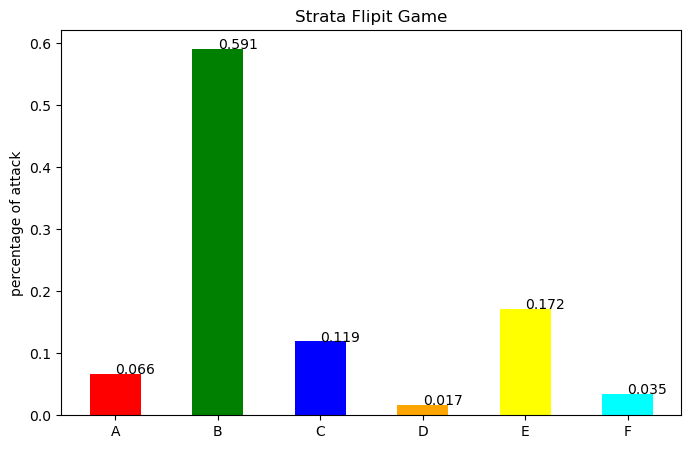

In [13]:
x=["A","B","C","D","E","F"]
y=[(np.mean(np.asarray(average_p_A))),(np.mean(np.asarray(average_p_B))),(np.mean(np.asarray(average_p_C))),(np.mean(np.asarray(average_p_D))),(np.mean(np.asarray(average_p_E))),(np.mean(np.asarray(average_p_F)))]
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(x, y, color =['red','green','blue','orange','yellow','cyan'],width=.5)
 
#plt.xlabel("")


for index, value in enumerate(y):
    plt.text(index, value, str(value))
    
plt.ylabel("percentage of attack")
plt.title("Strata Flipit Game")
plt.show()